In [2]:
import GPI_init_fit as gpi
from astropy.stats import bayesian_info_criterion as bic
from astropy.stats import akaike_info_criterion as aic

/home/blewis/anaconda3/lib/python3.12/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


webbpsf_ext log messages of level WARN and above will be shown.
webbpsf_ext log outputs will be directed to the screen.
CuPy succesfully imported. Using GPU where applicable. Set use_gpu=False to override this functionality.


In [3]:
import glob
list = glob.glob('../GPI_data/*.fits')
print(list[0].split('/')[2].split(".")[0])

hd145560_H_pol


In [4]:
print(list[18:])

['../GPI_data/aumic_H_pol.fits', '../GPI_data/hd143675_H_pol.fits', '../GPI_data/hd131835_H_pol.fits', '../GPI_data/hd106906_H_pol.fits', '../GPI_data/hd114082_H_pol.fits', '../GPI_data/hd191089_H_pol.fits', '../GPI_data/hd156623_H_pol.fits']


running initial fits for hd143675_H_pol
         Current function value: 48732.085215
         Iterations: 72
         Function evaluations: 3793
         Gradient evaluations: 210
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 48732.08521509123
        x: [ 2.488e+01 -4.999e+00 ... -2.355e+00 -1.820e+00]
      nit: 72
      jac: [ 7.080e-02  5.571e-01 ...  3.418e-03  5.371e-03]
 hess_inv: [[ 1.259e+01 -1.236e-01 ... -4.092e+00 -1.997e+01]
            [-1.236e-01  7.435e-03 ...  7.170e-02  3.436e-01]
            ...
            [-4.092e+00  7.170e-02 ...  3.129e+00  1.214e+01]
            [-1.997e+01  3.436e-01 ...  1.214e+01  6.017e+01]]
     nfev: 3793
     njev: 210
I AM PLOTTING
for 4 knots: 
ll:  -48732.08521509123
AIC:  97506.17043018246
BIC:  97682.27461791986


         Current function value: 48762.368198
         Iterations: 1
         Function evaluations: 392
         Gradient evaluations: 20
  message: Desi

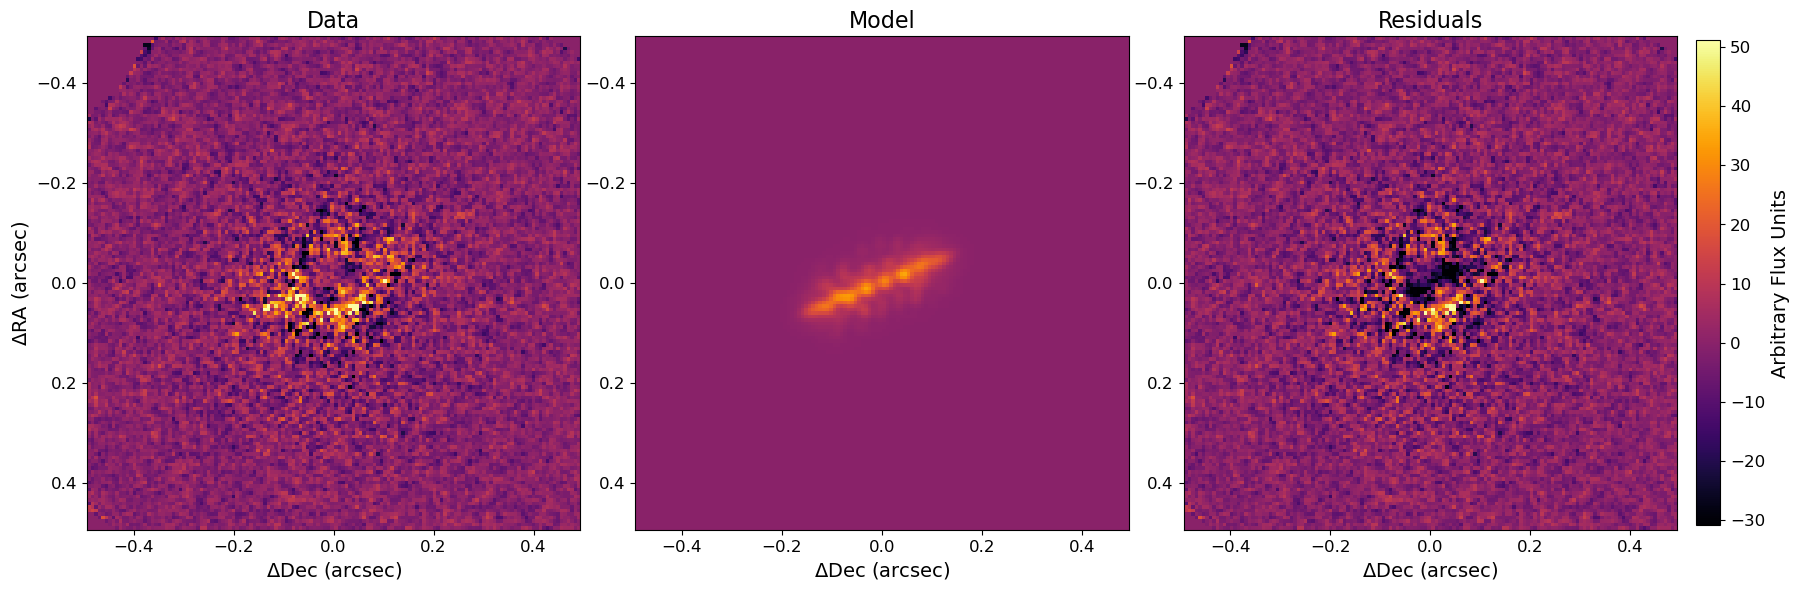

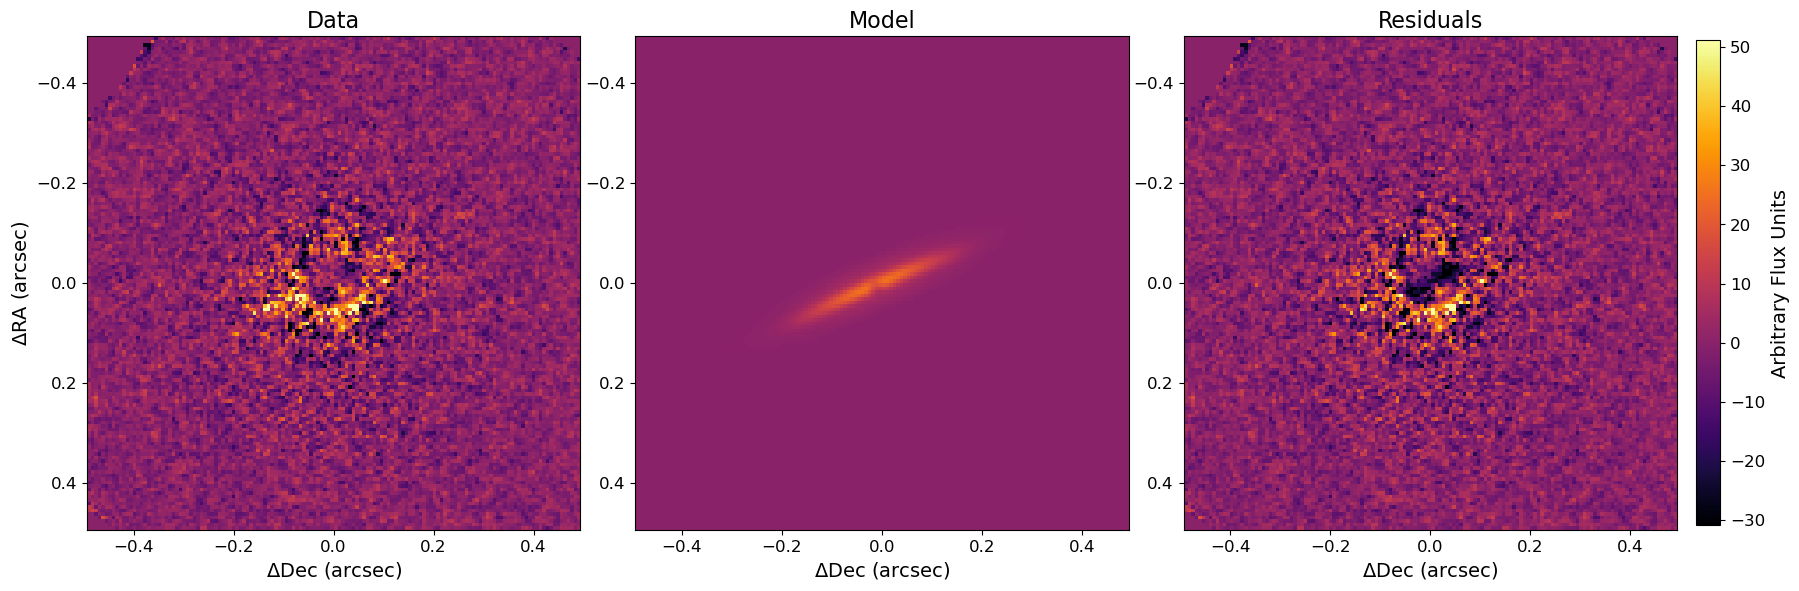

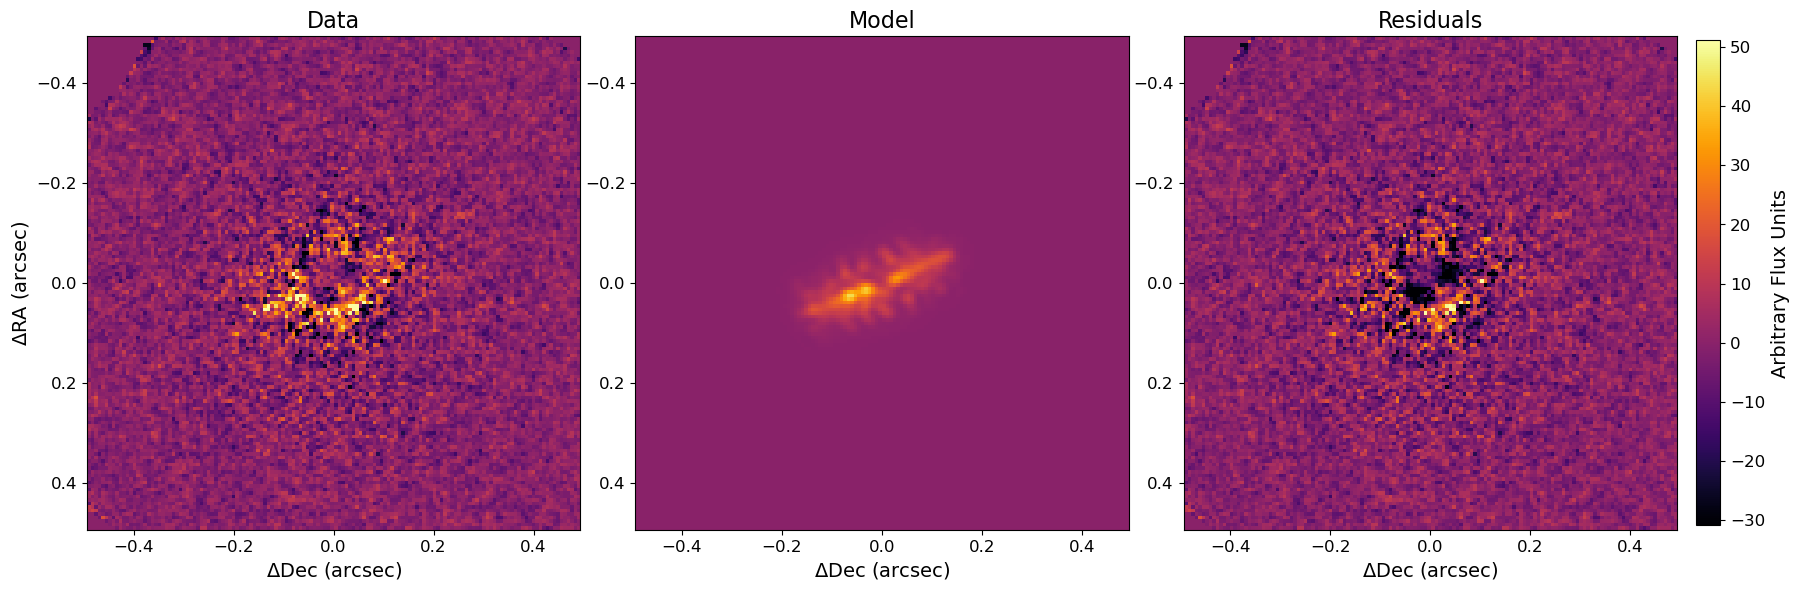

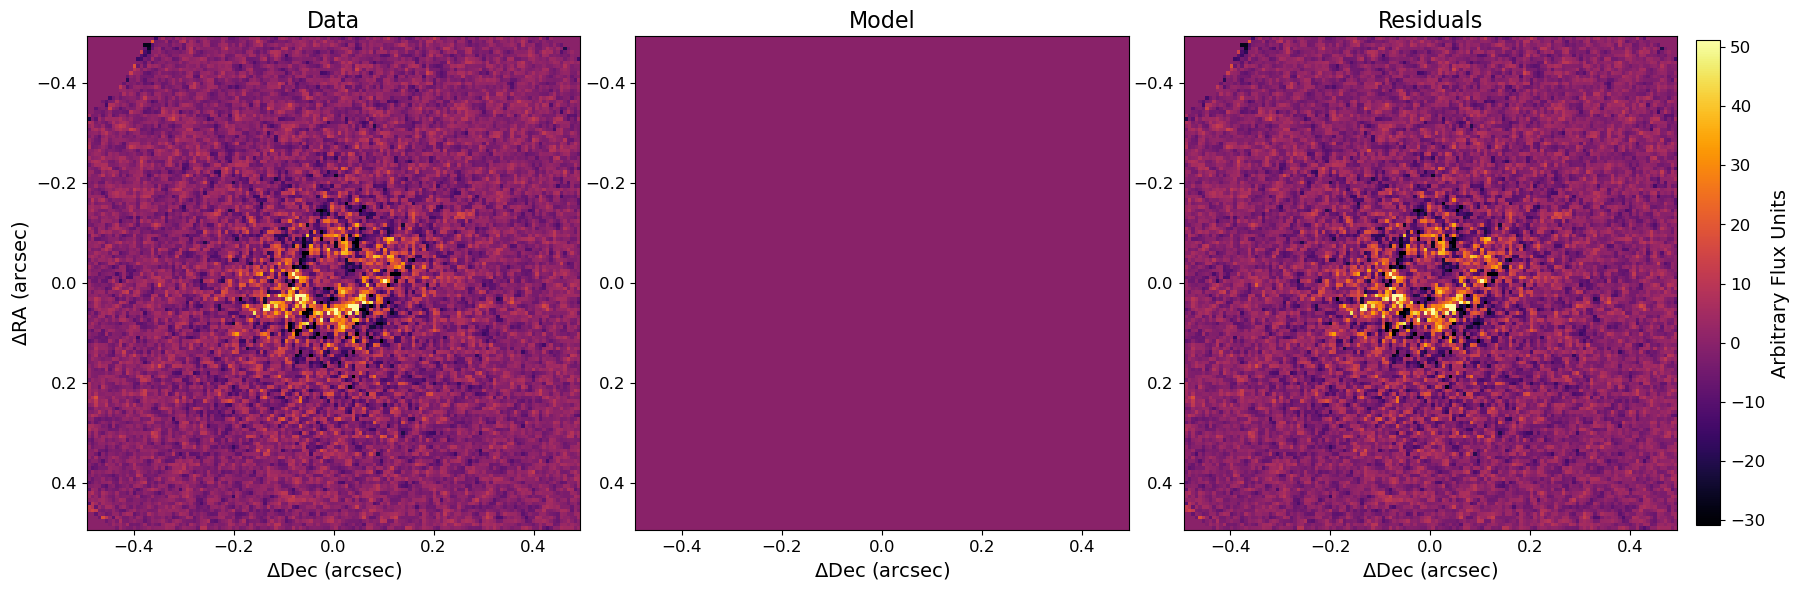

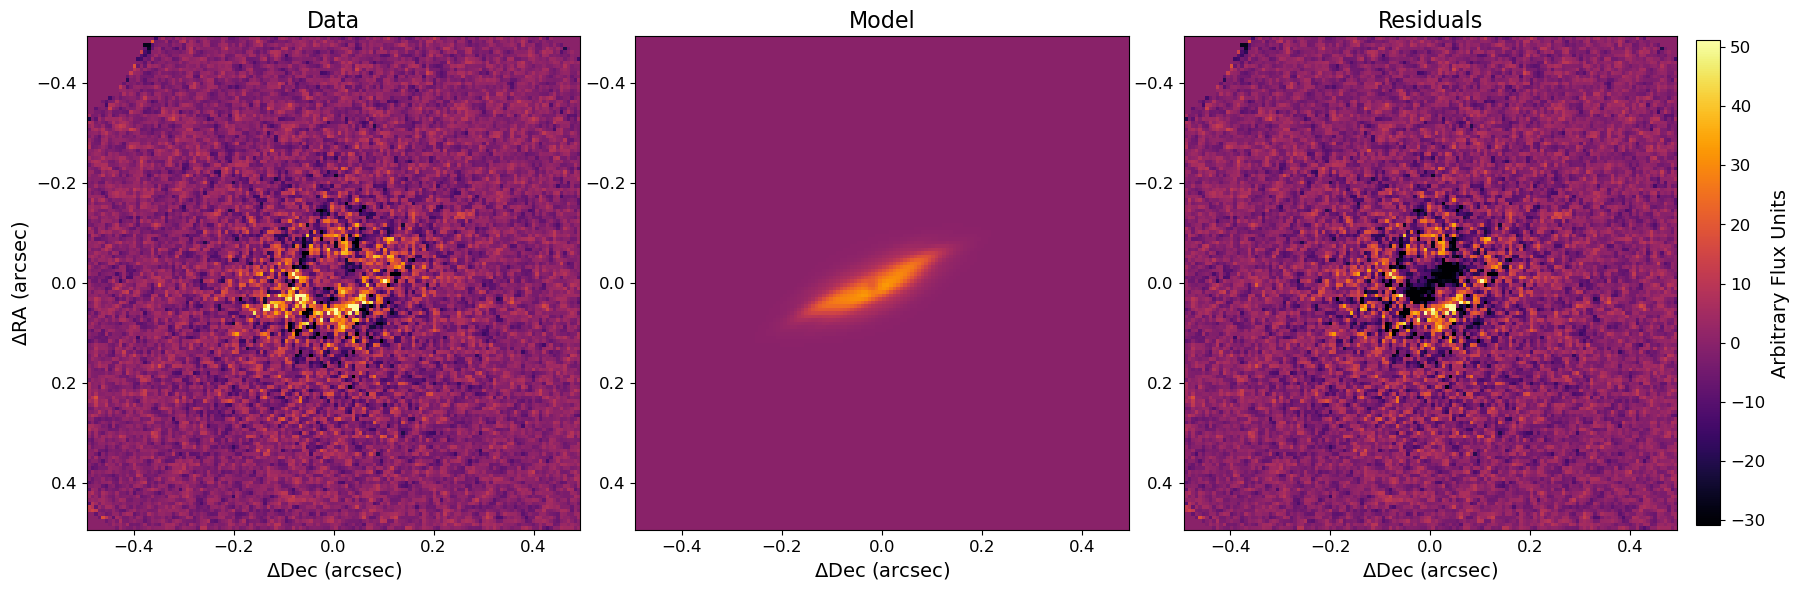

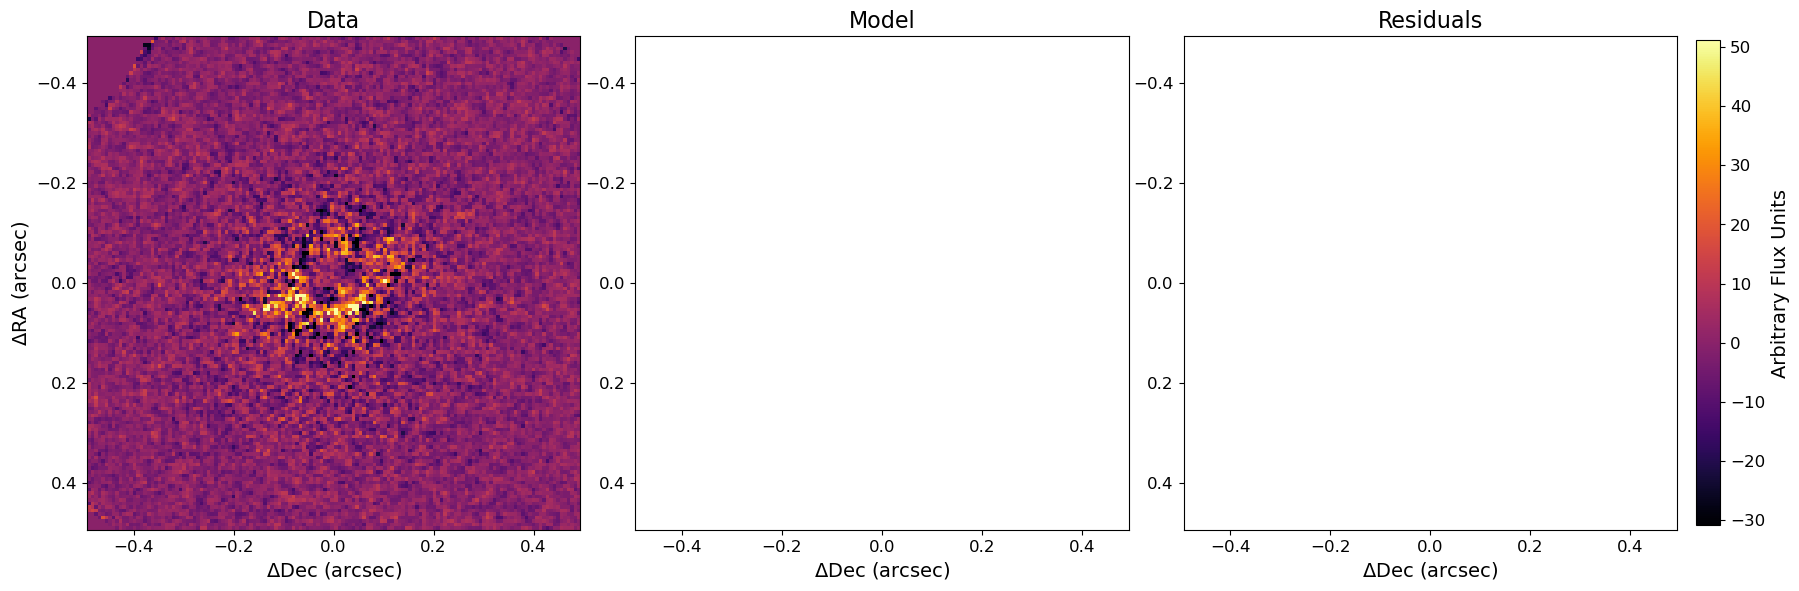

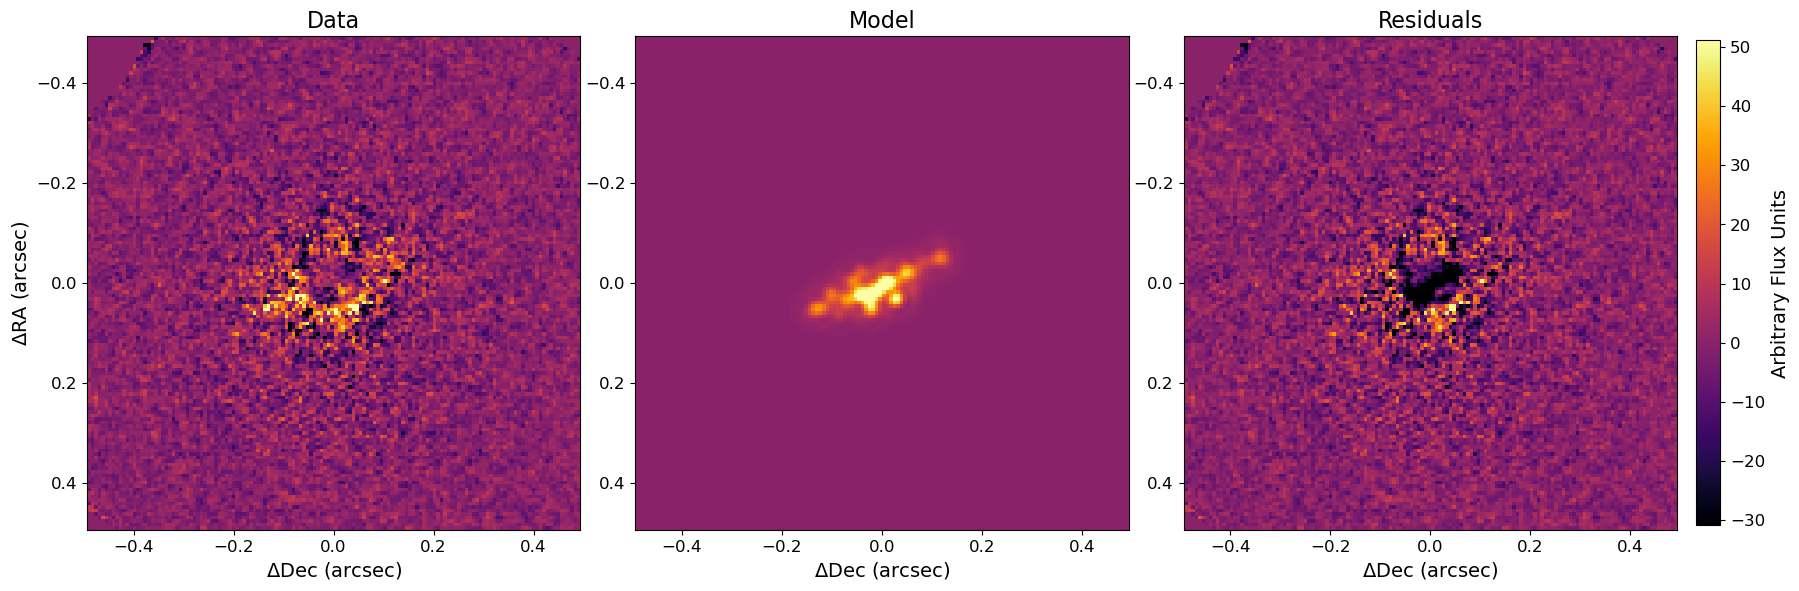

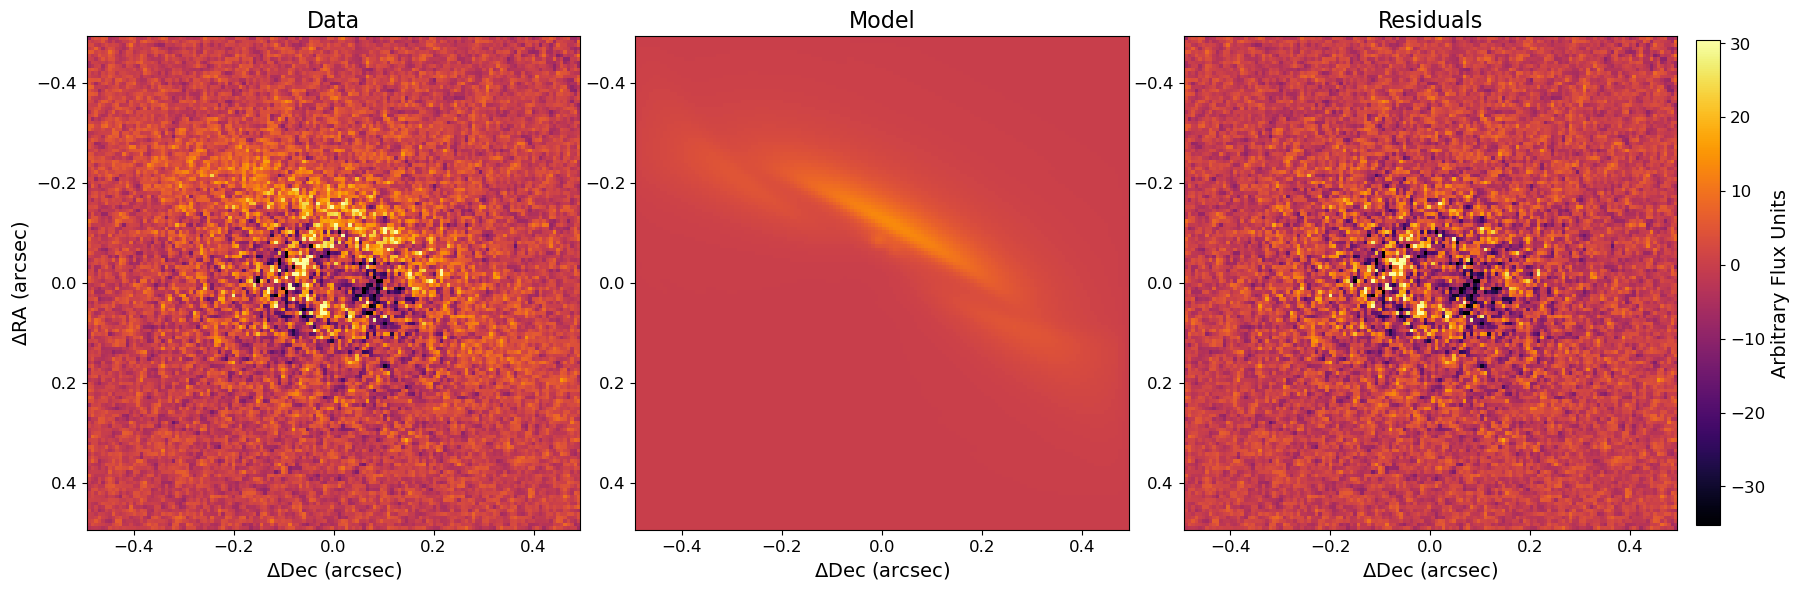

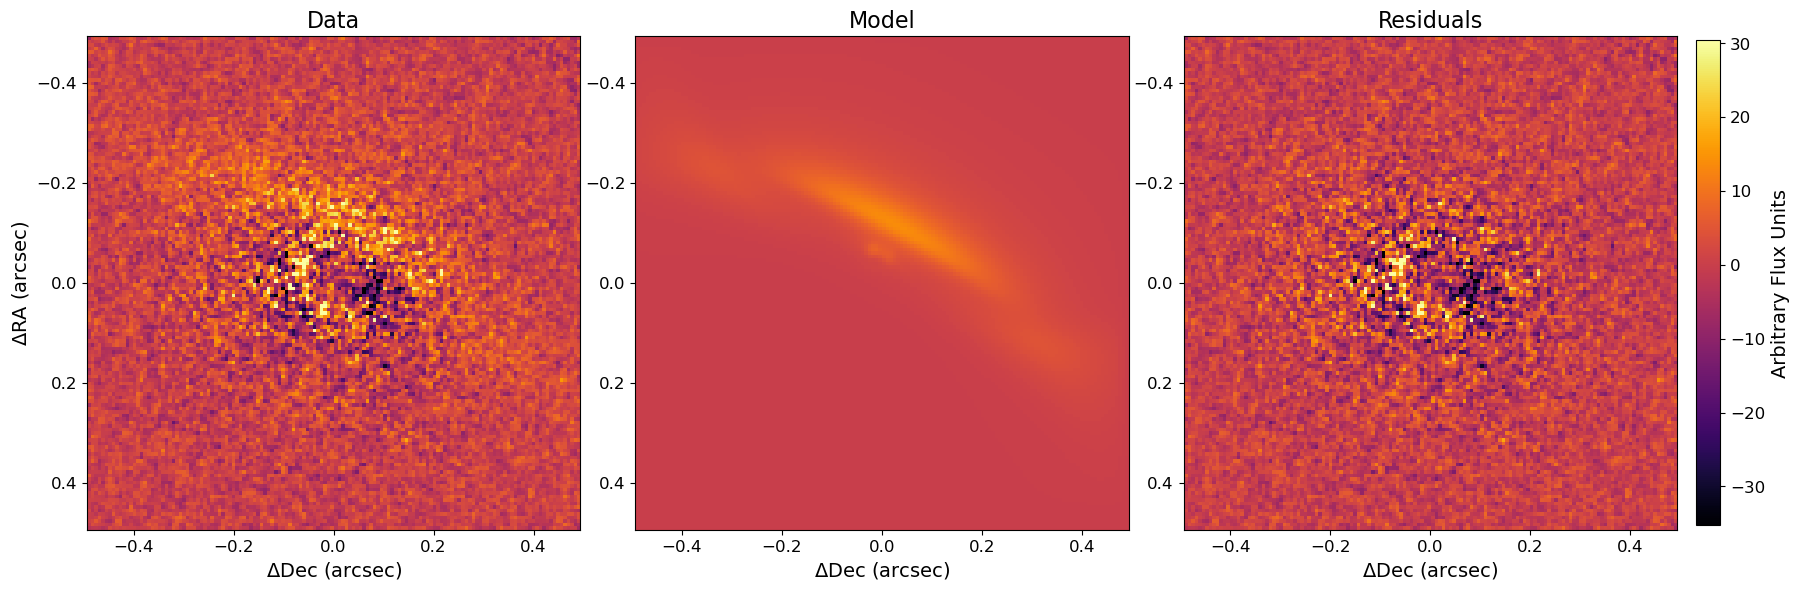

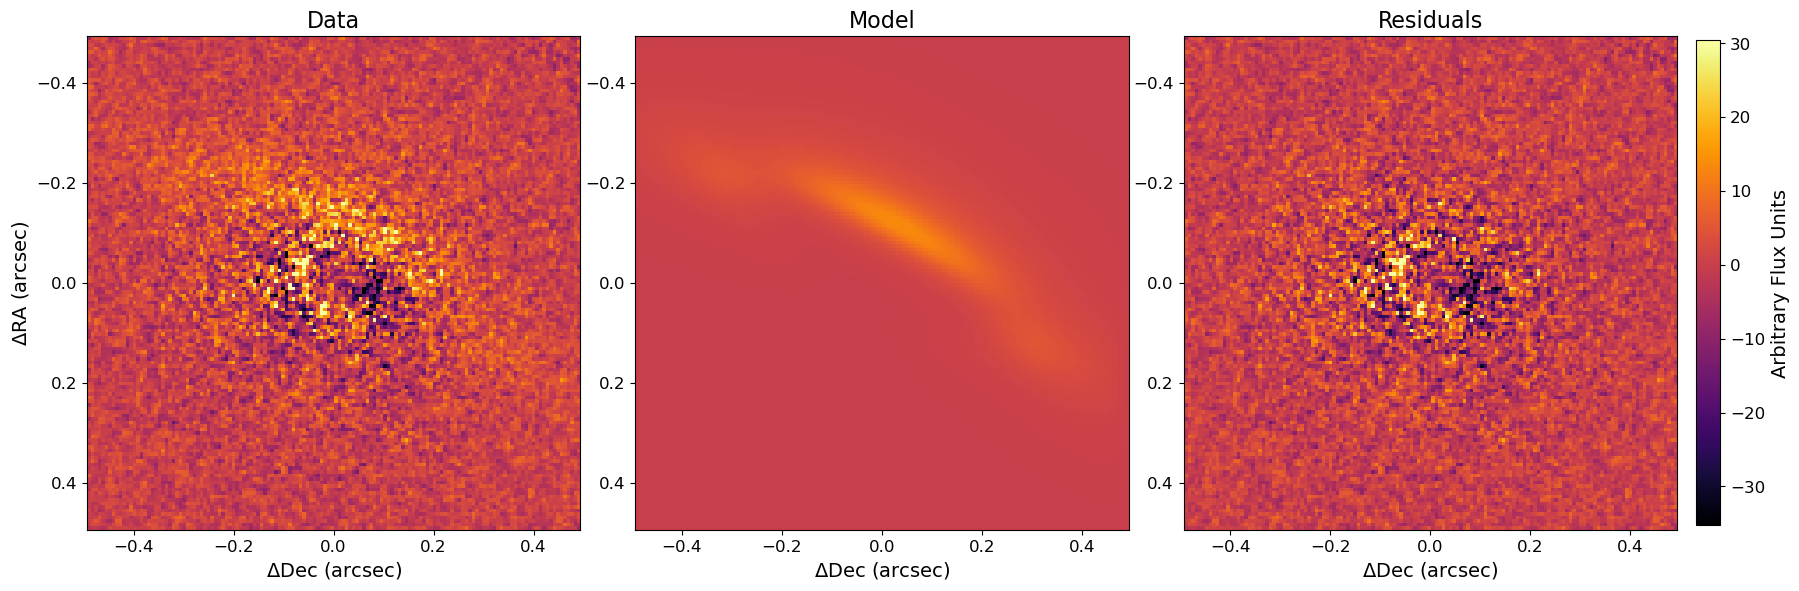

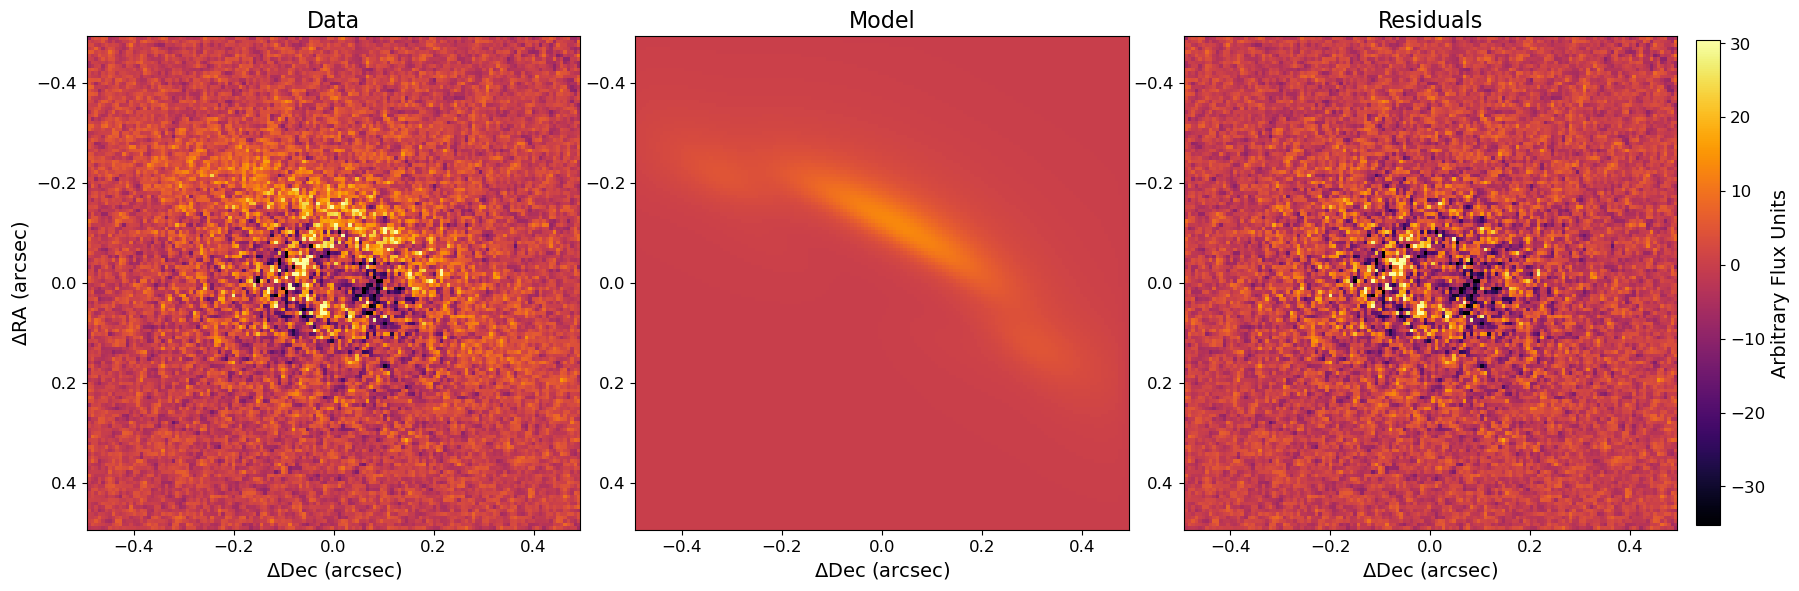

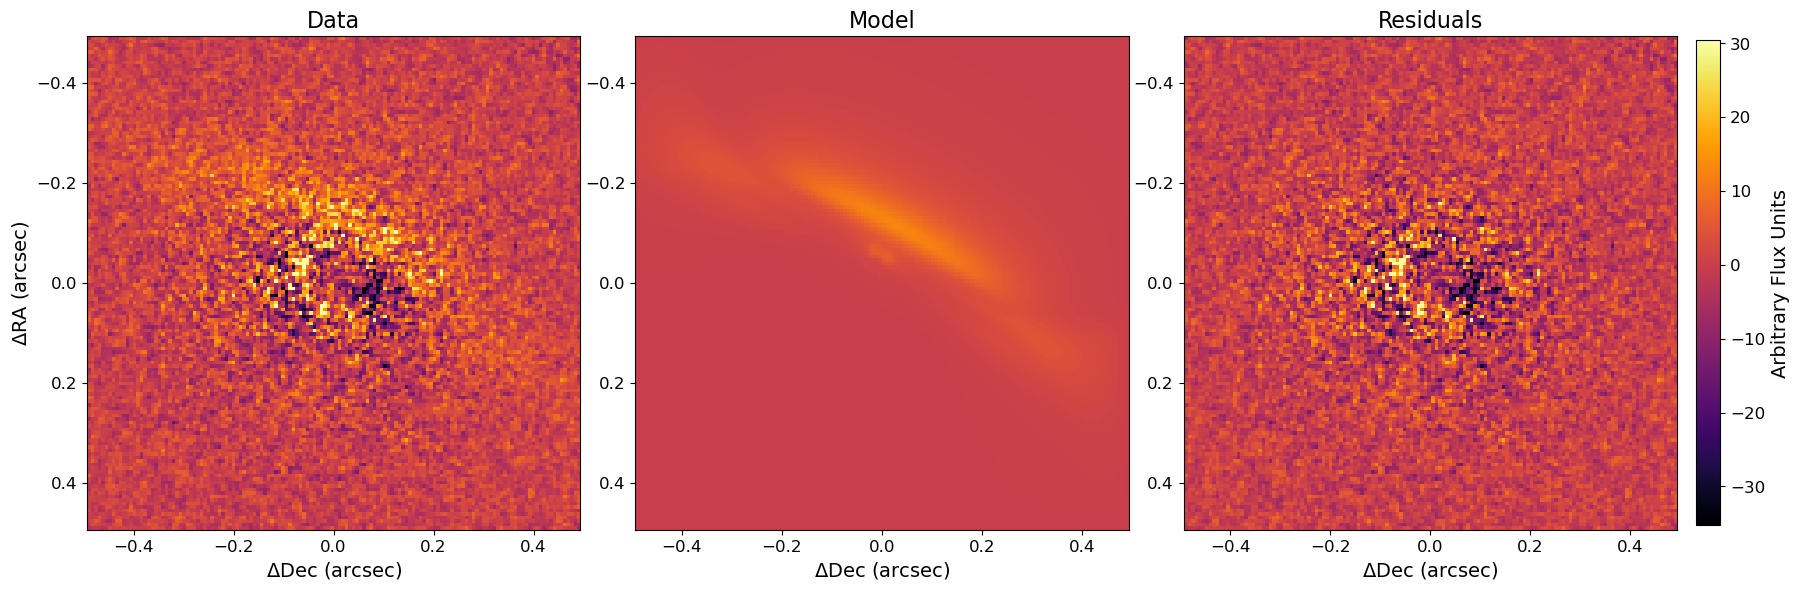

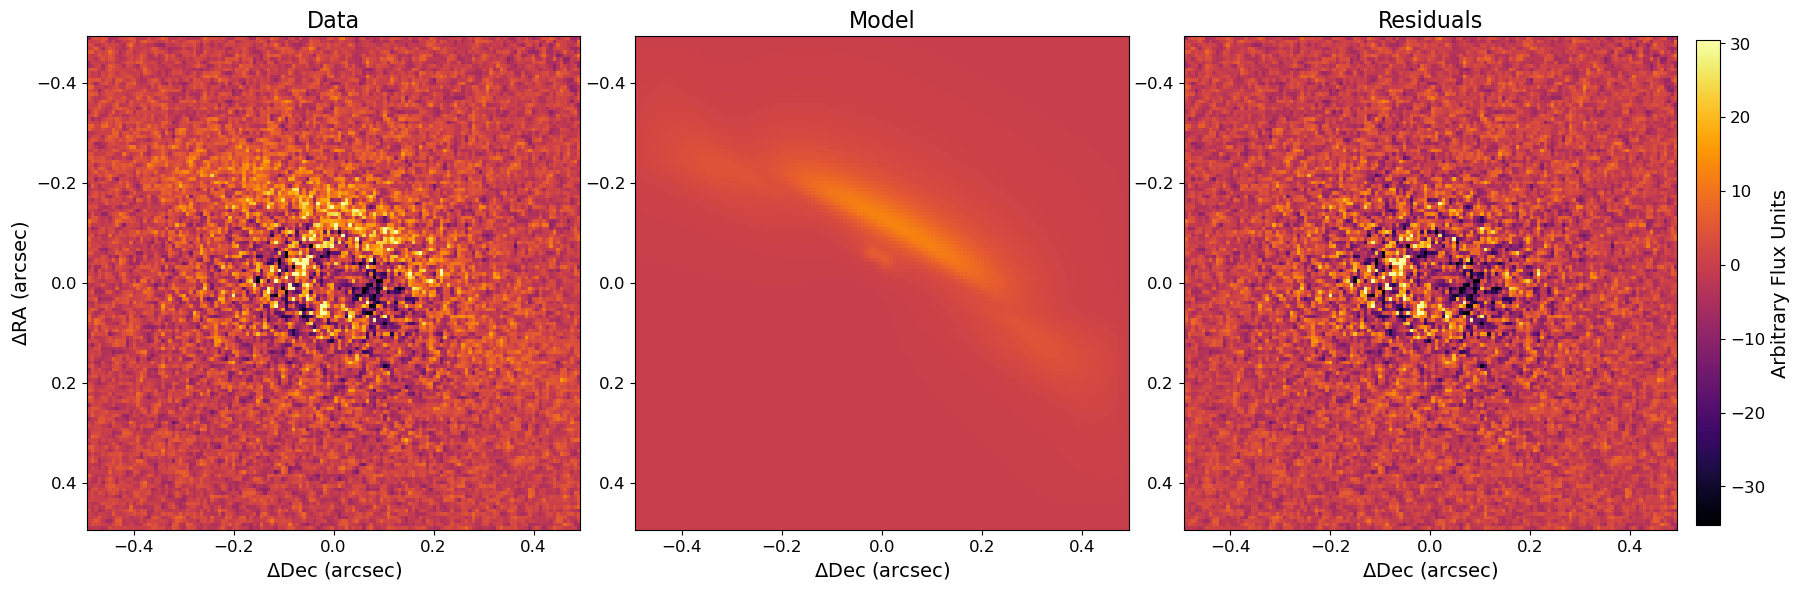

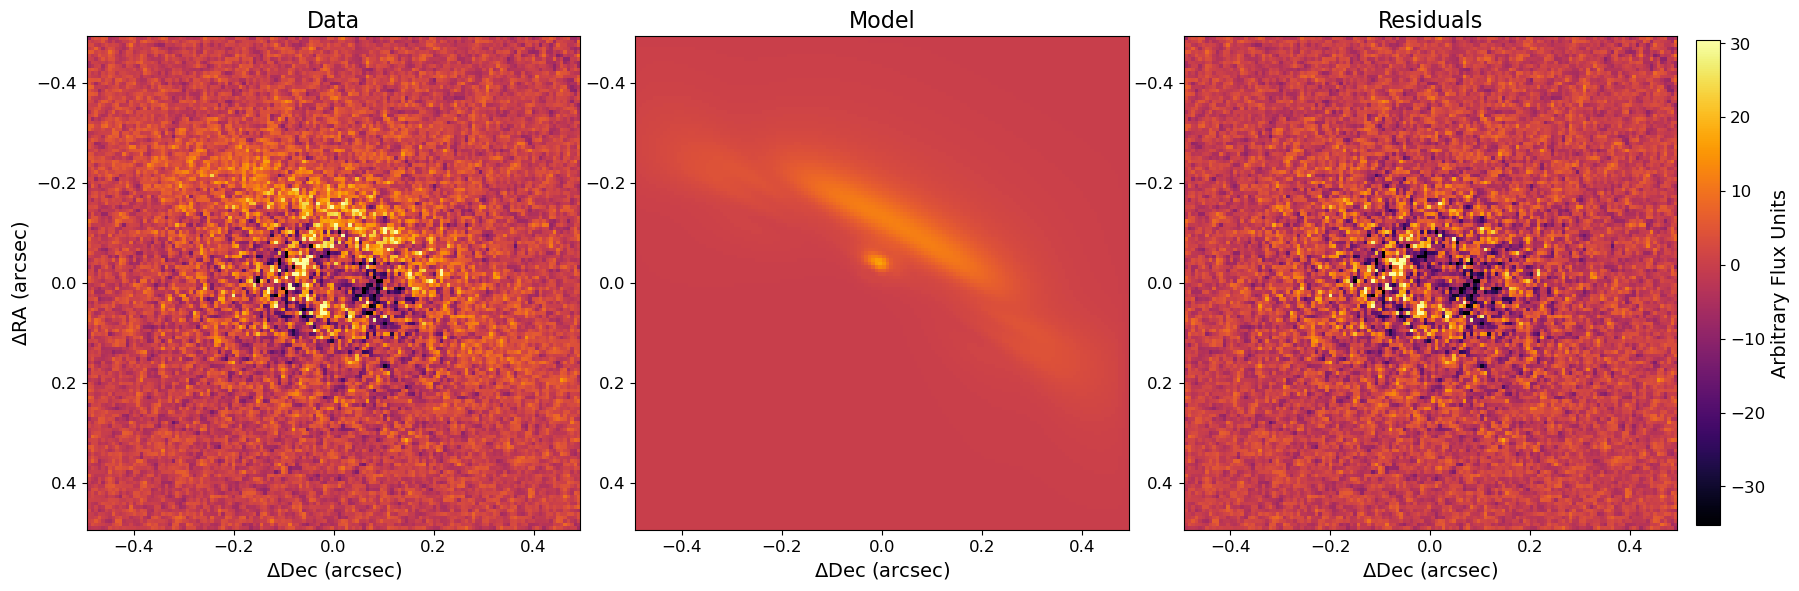

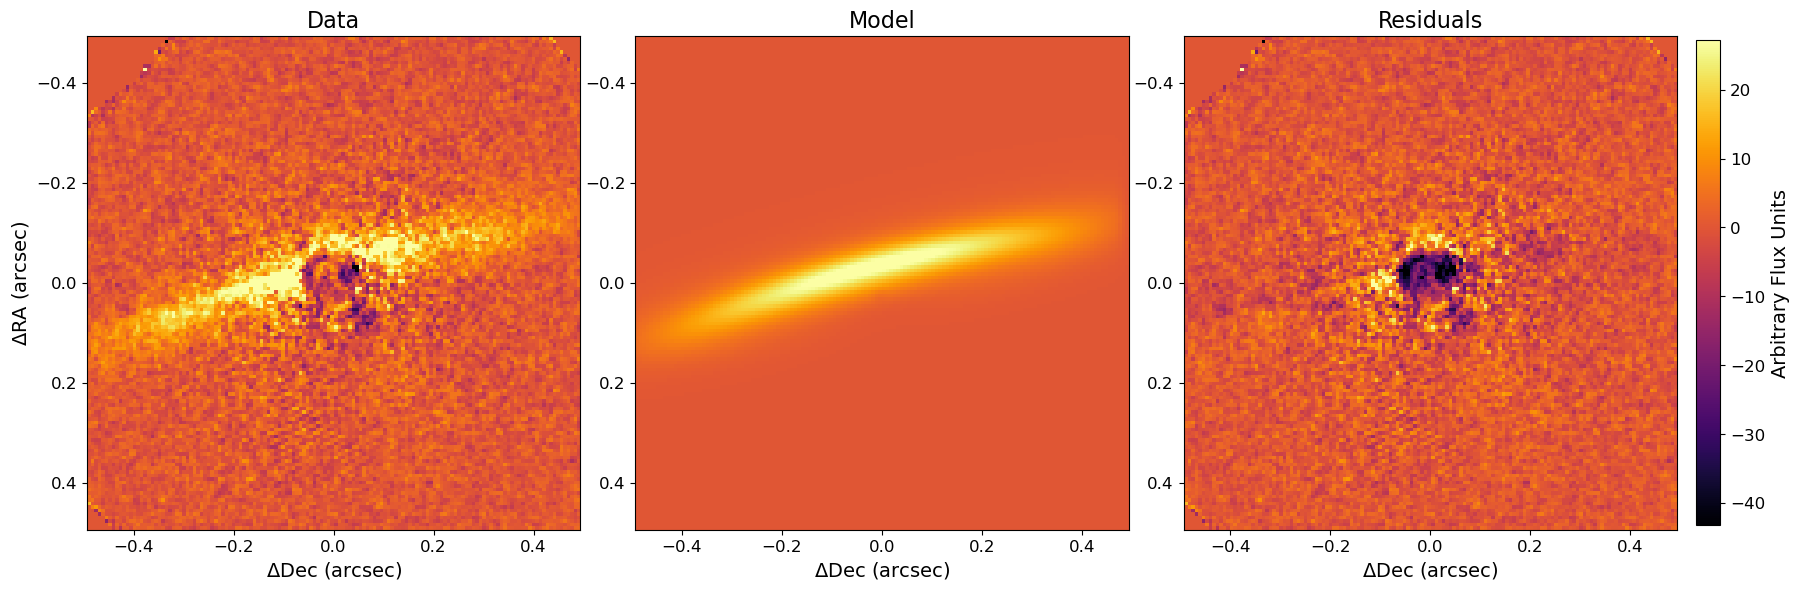

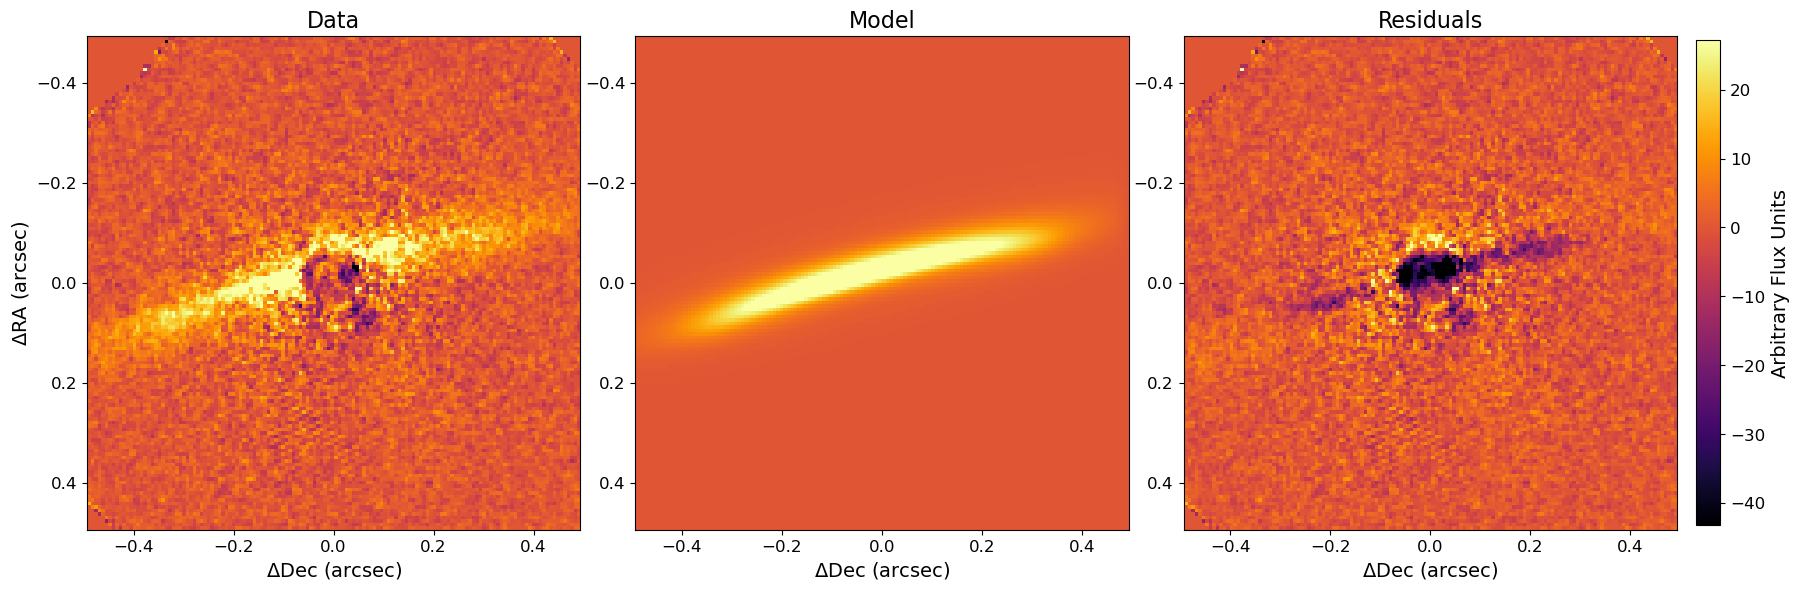

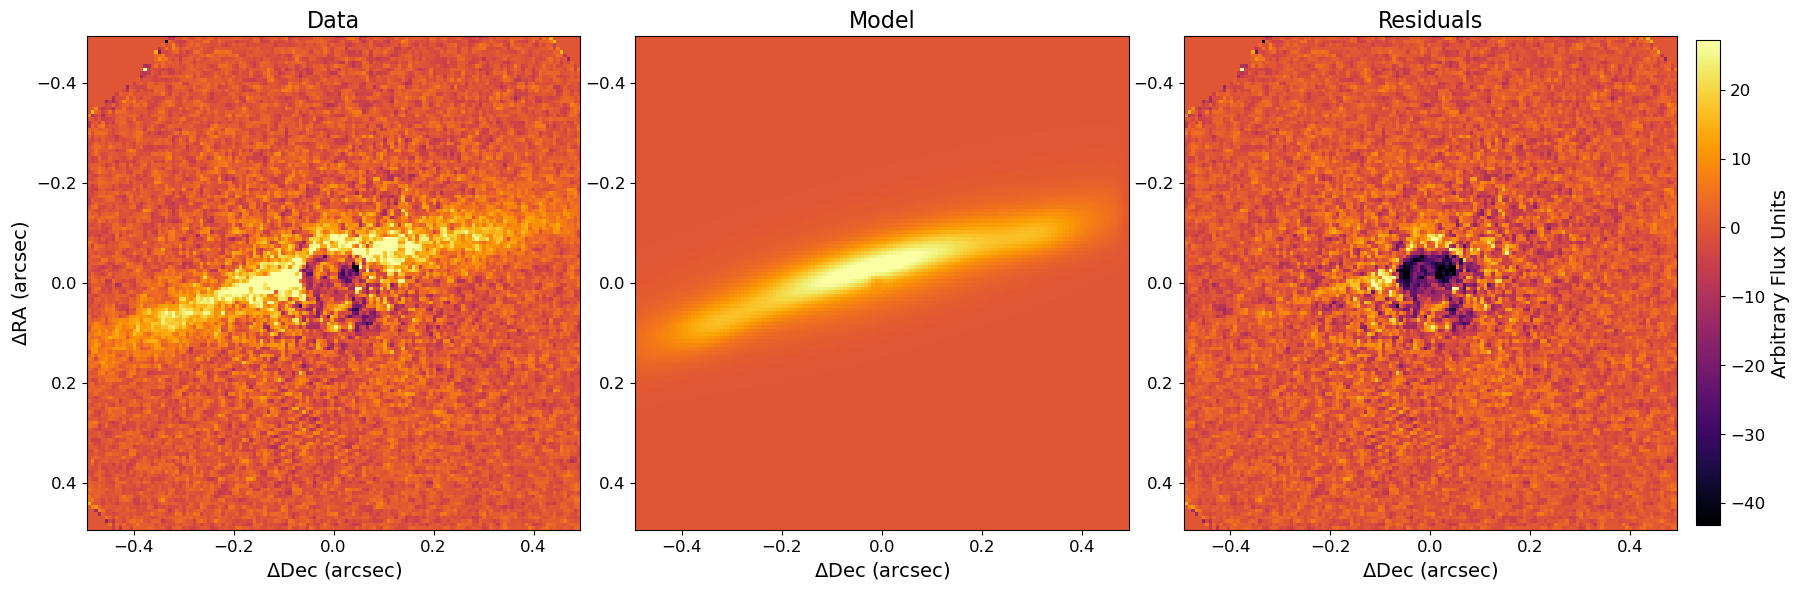

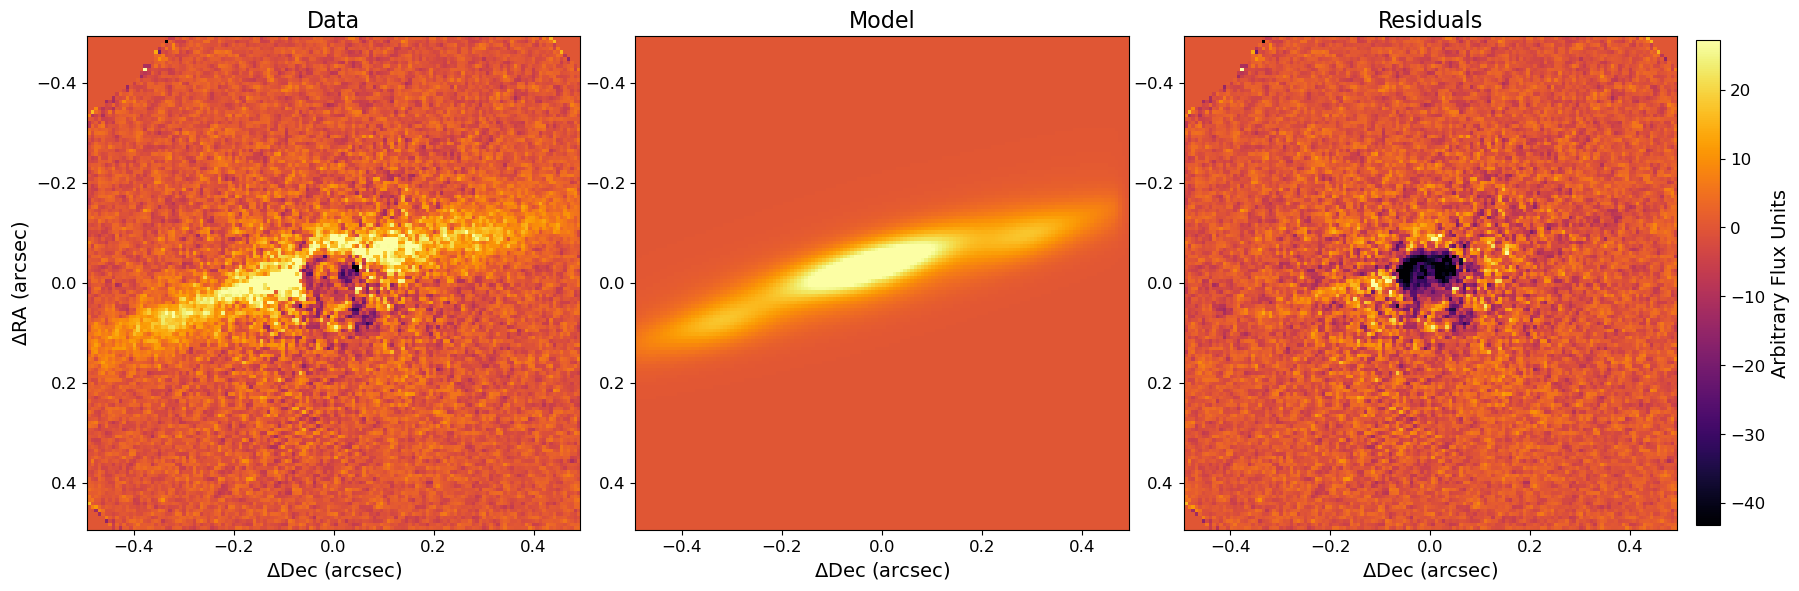

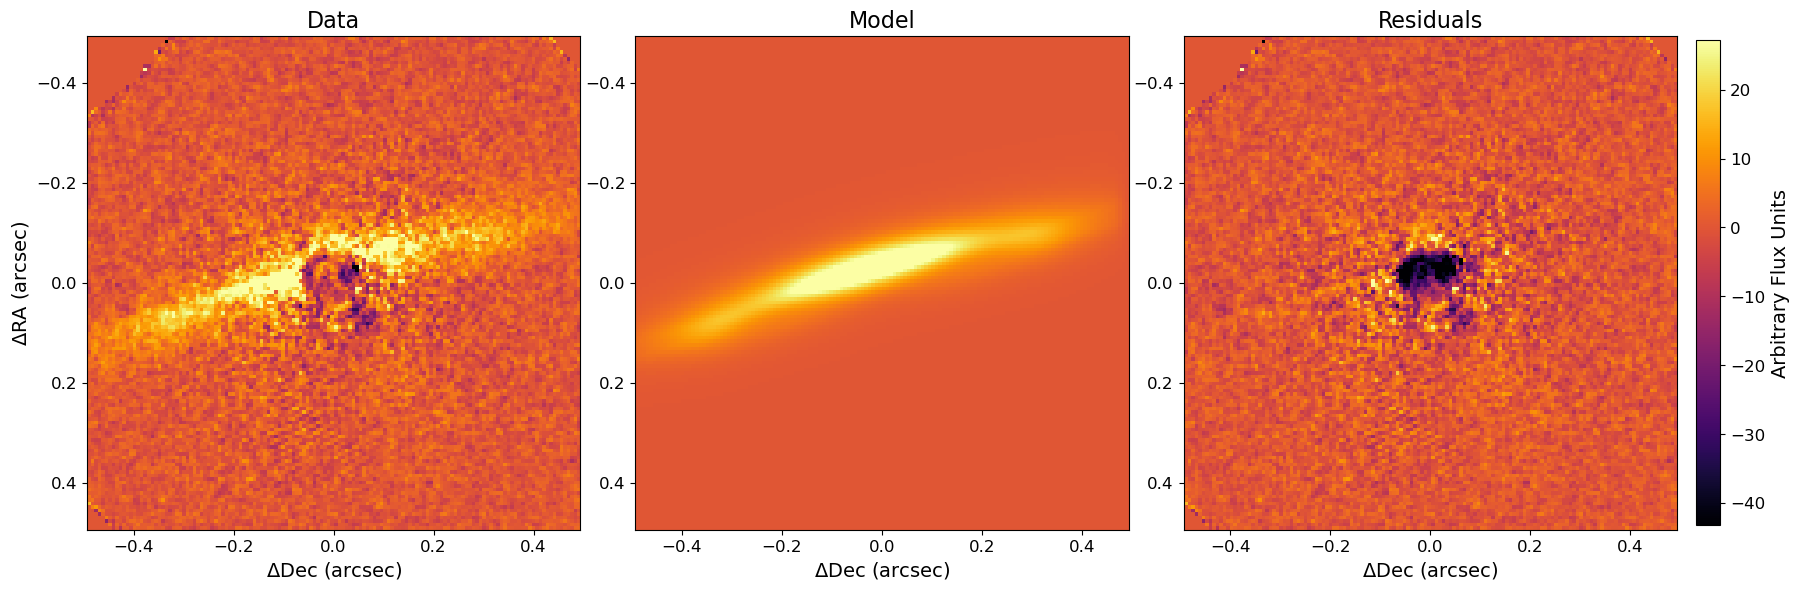

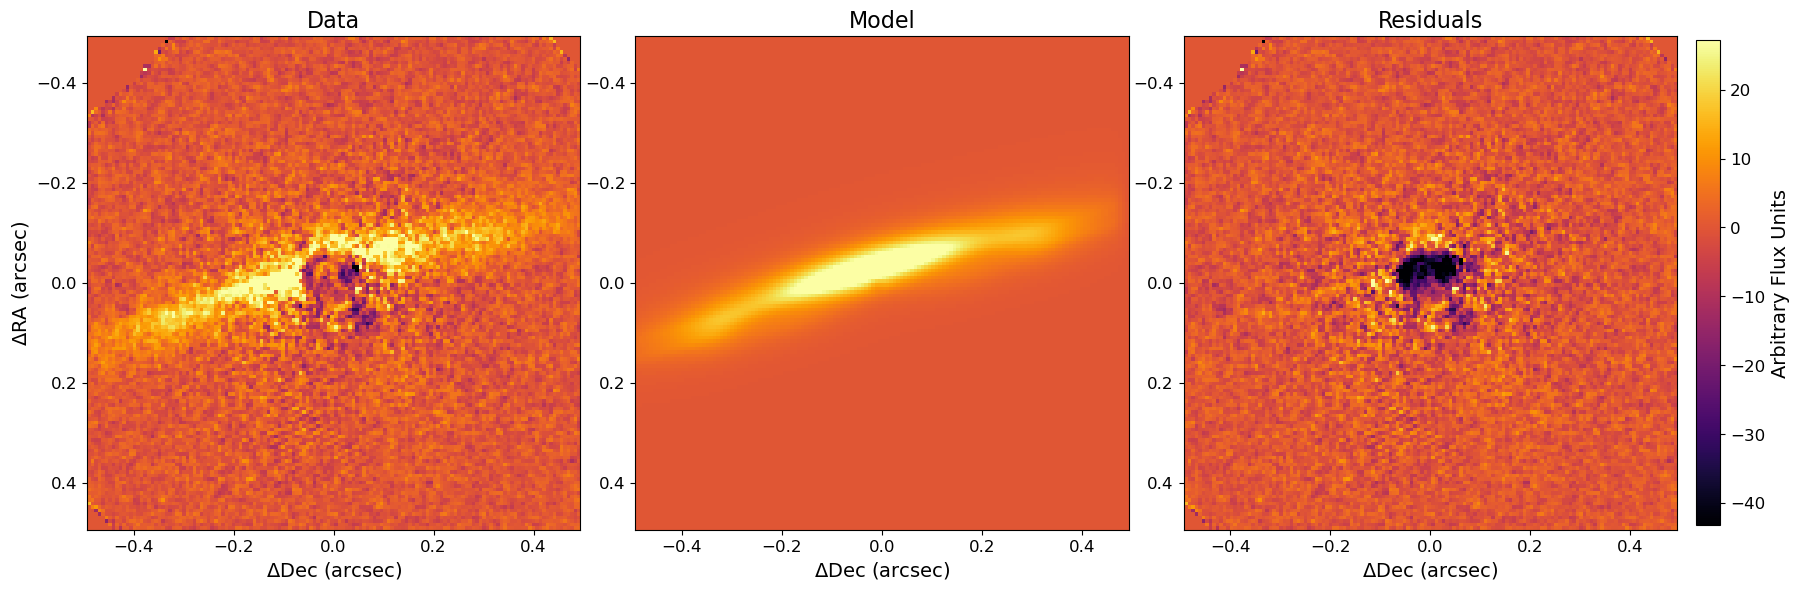

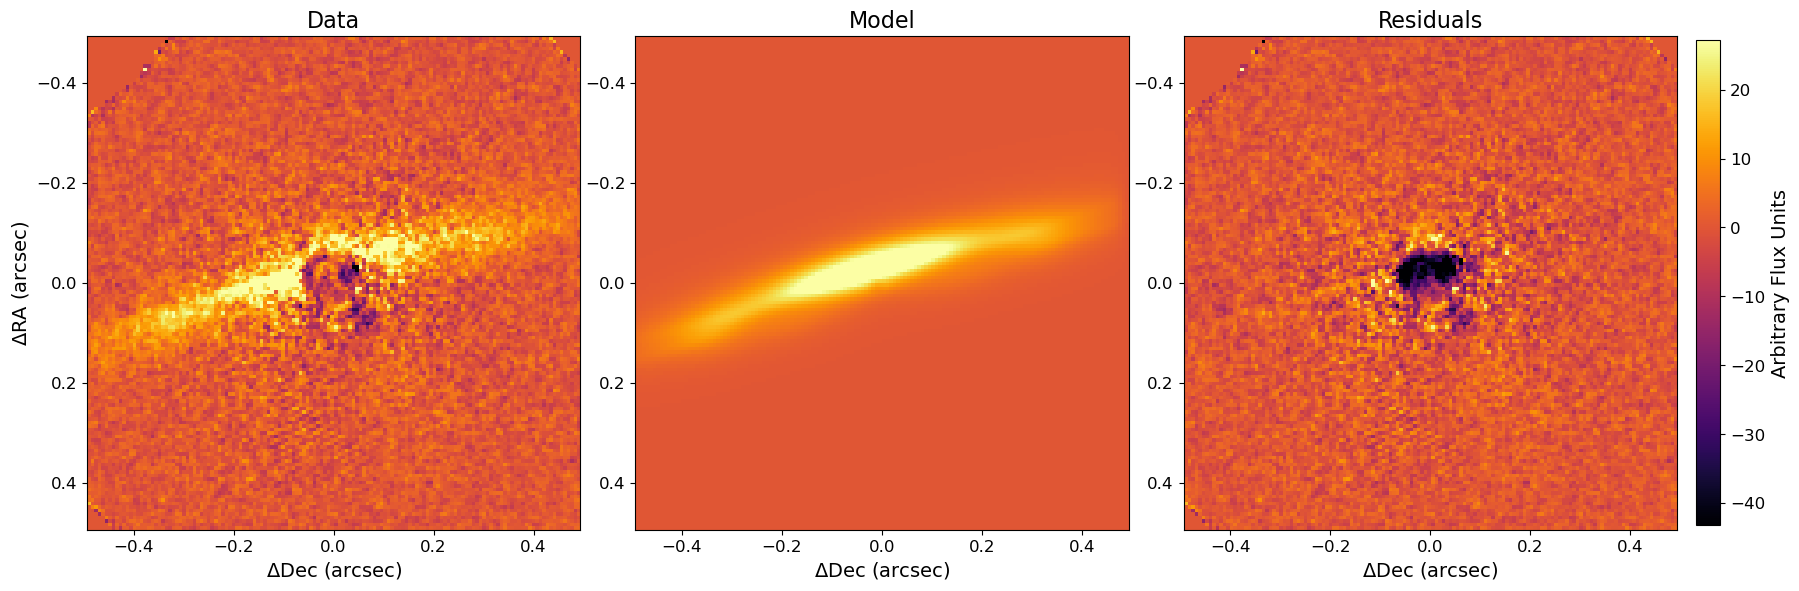

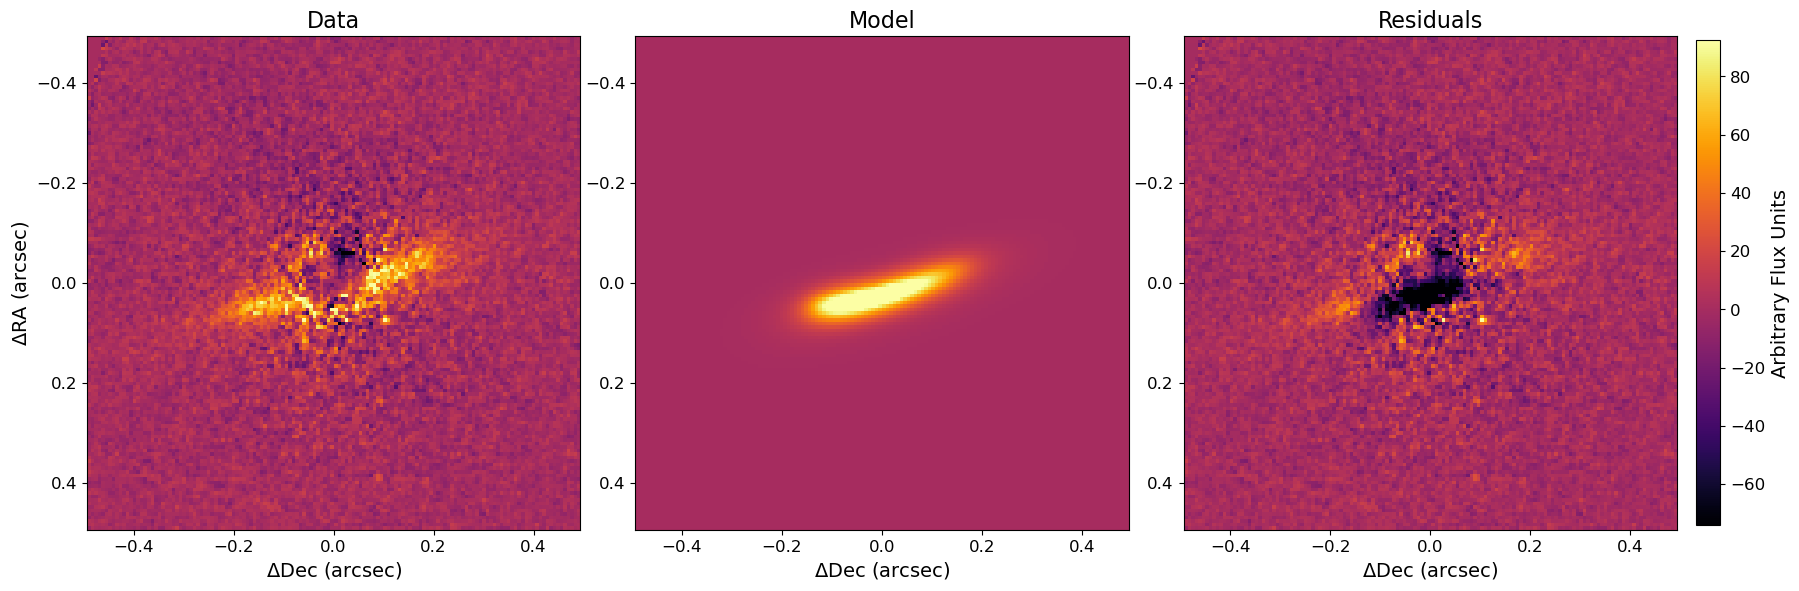

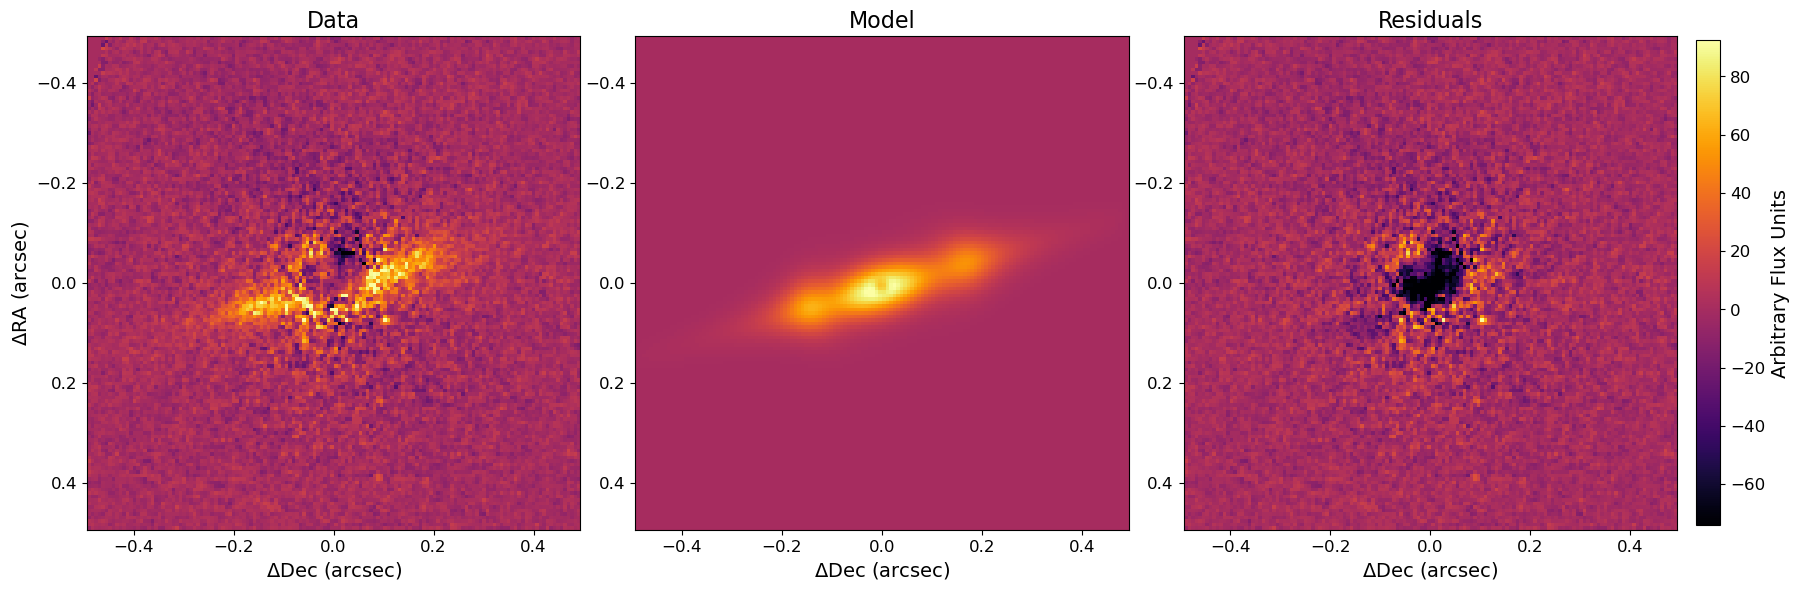

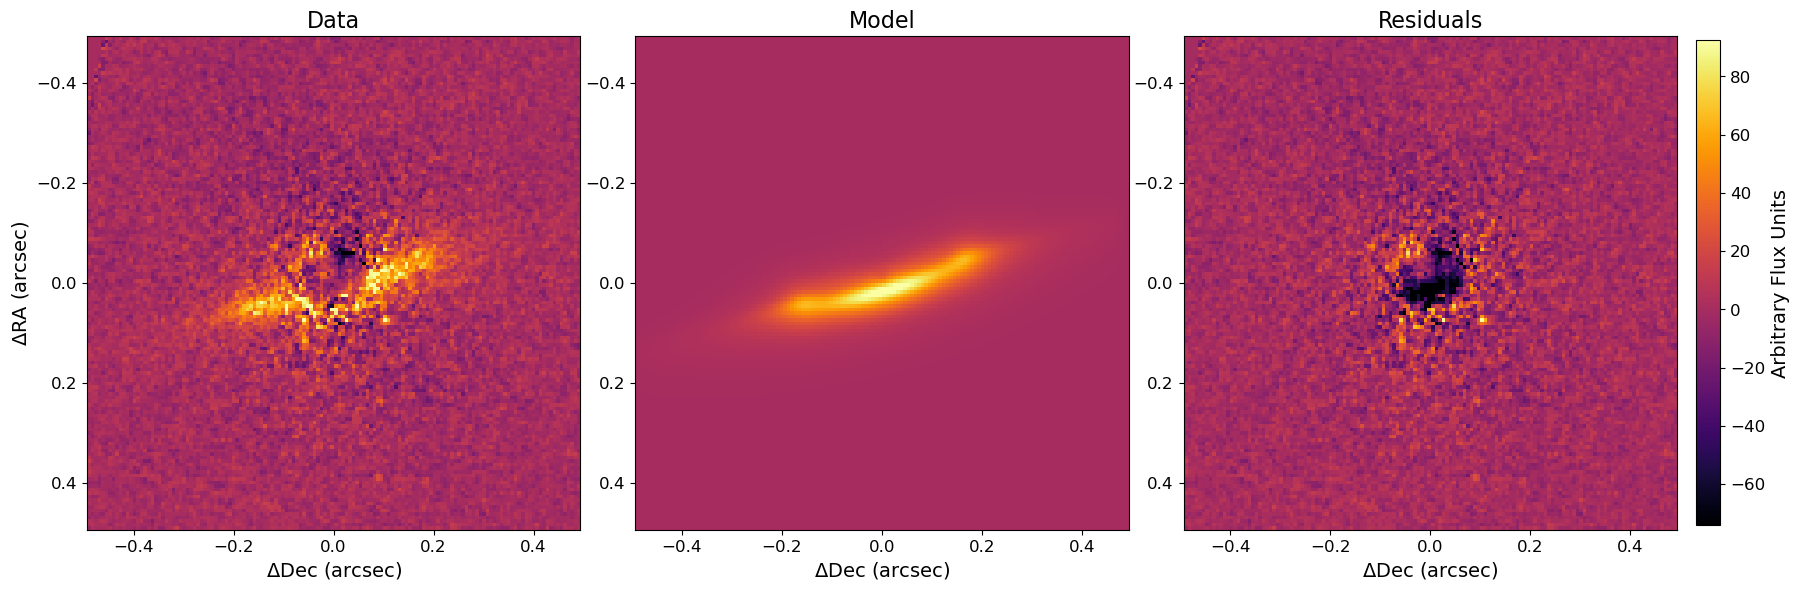

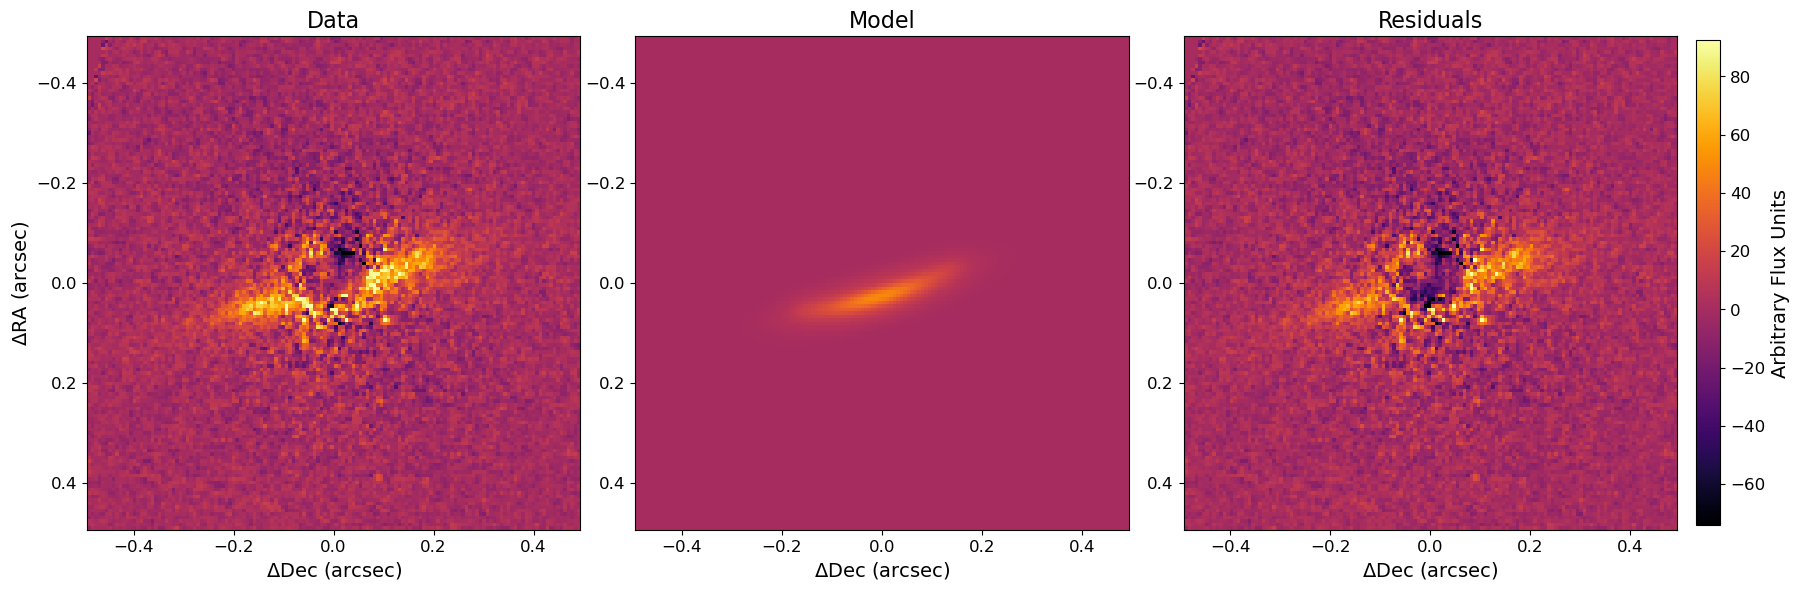

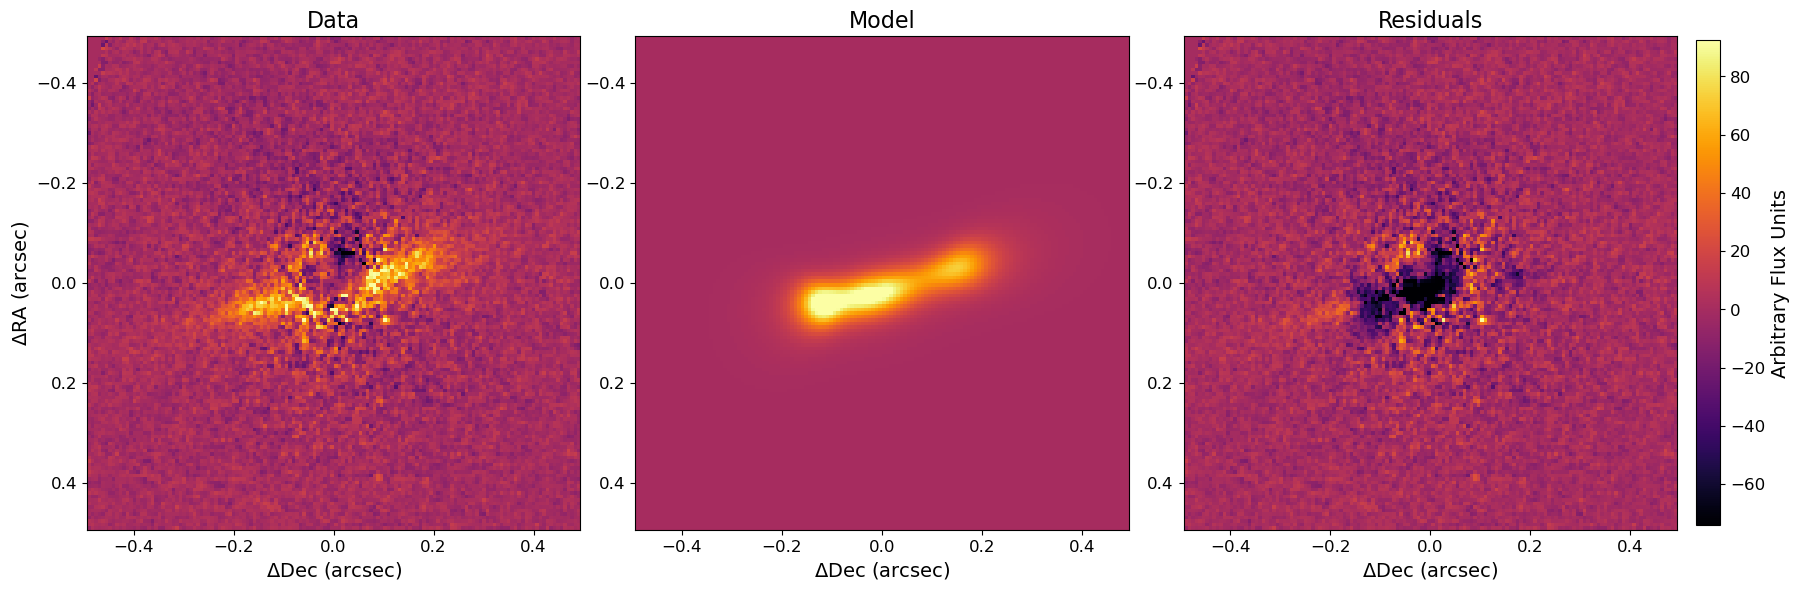

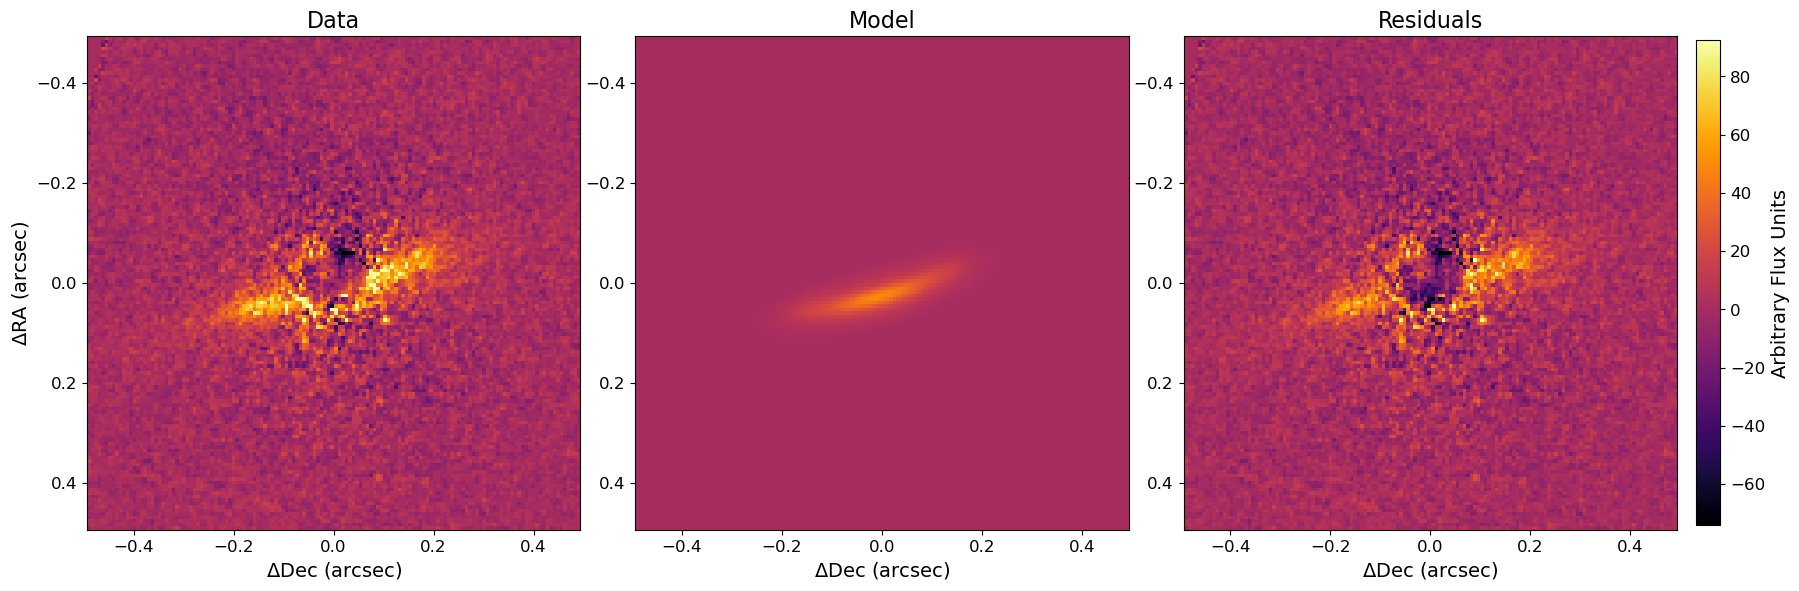

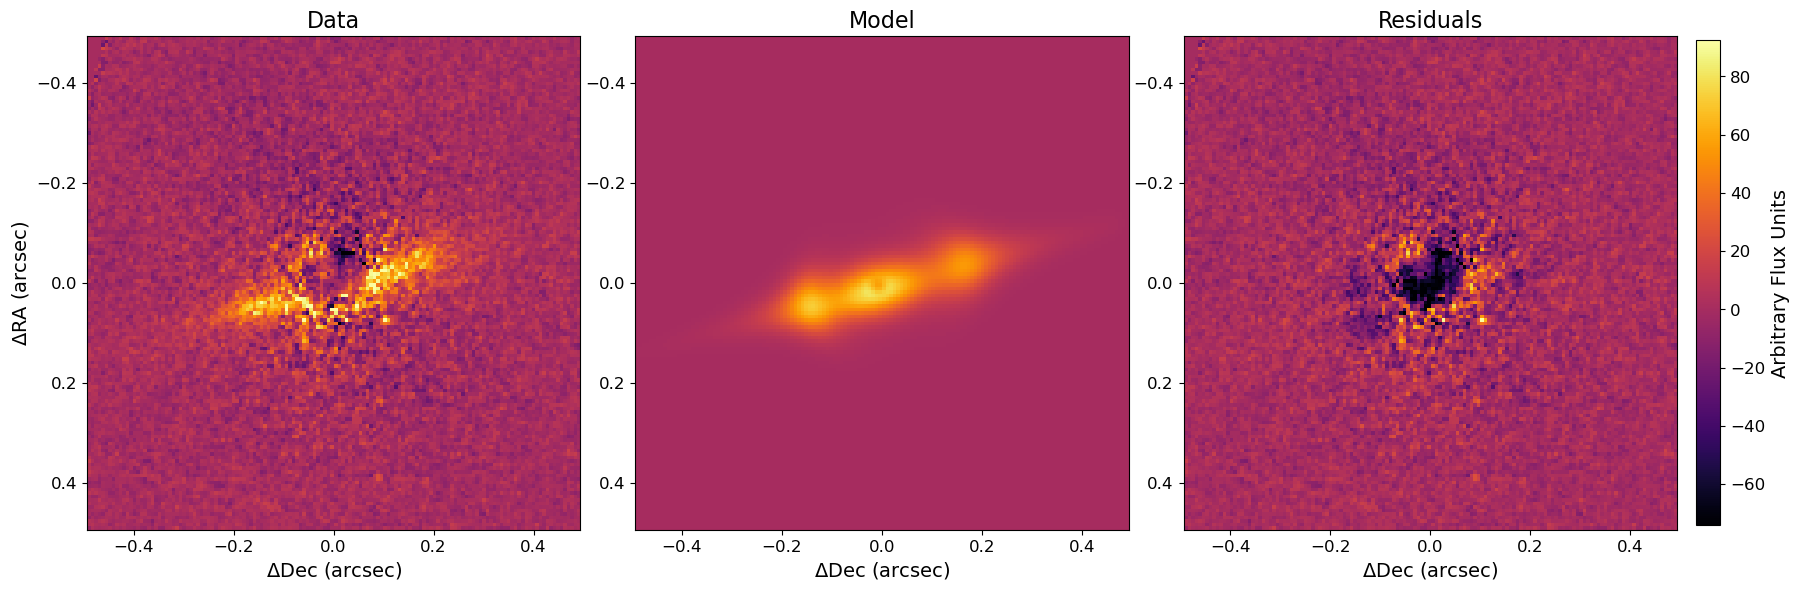

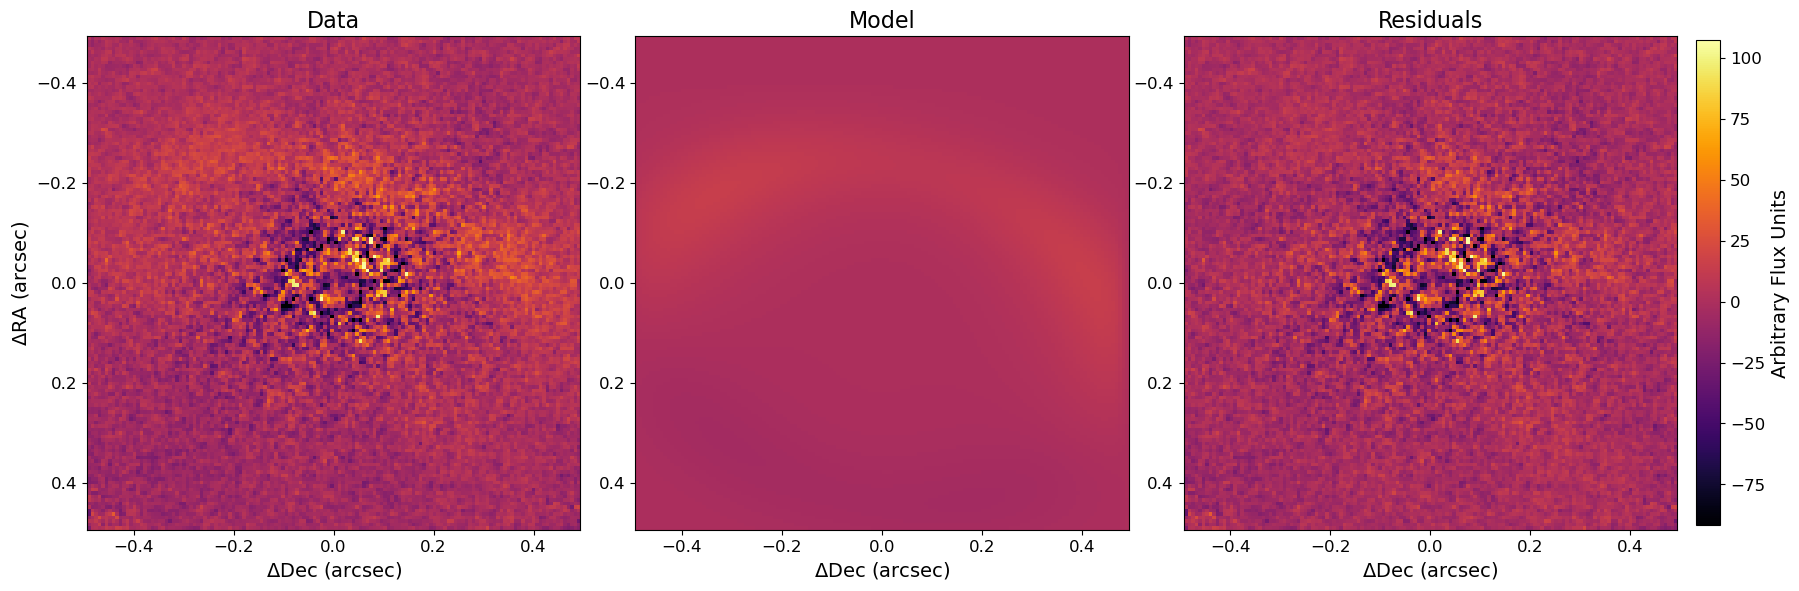

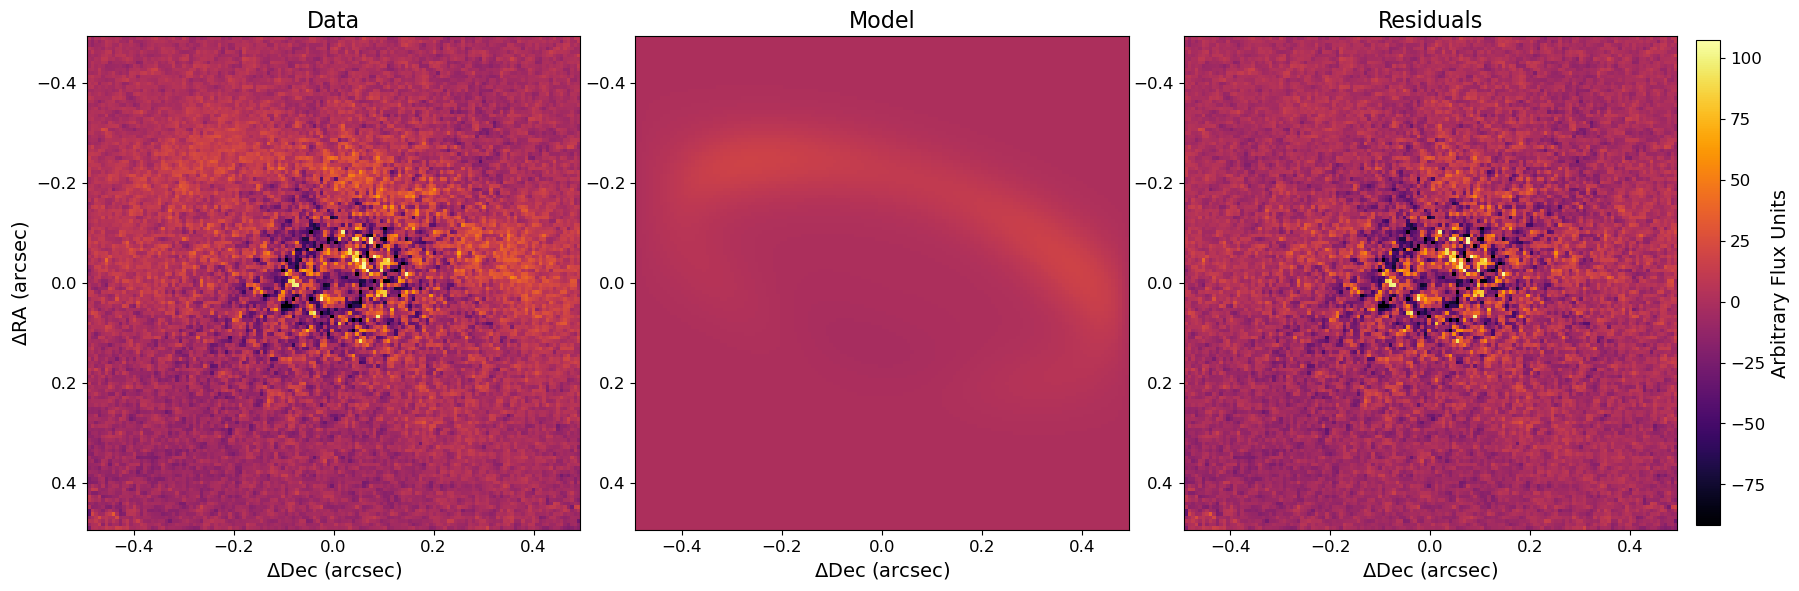

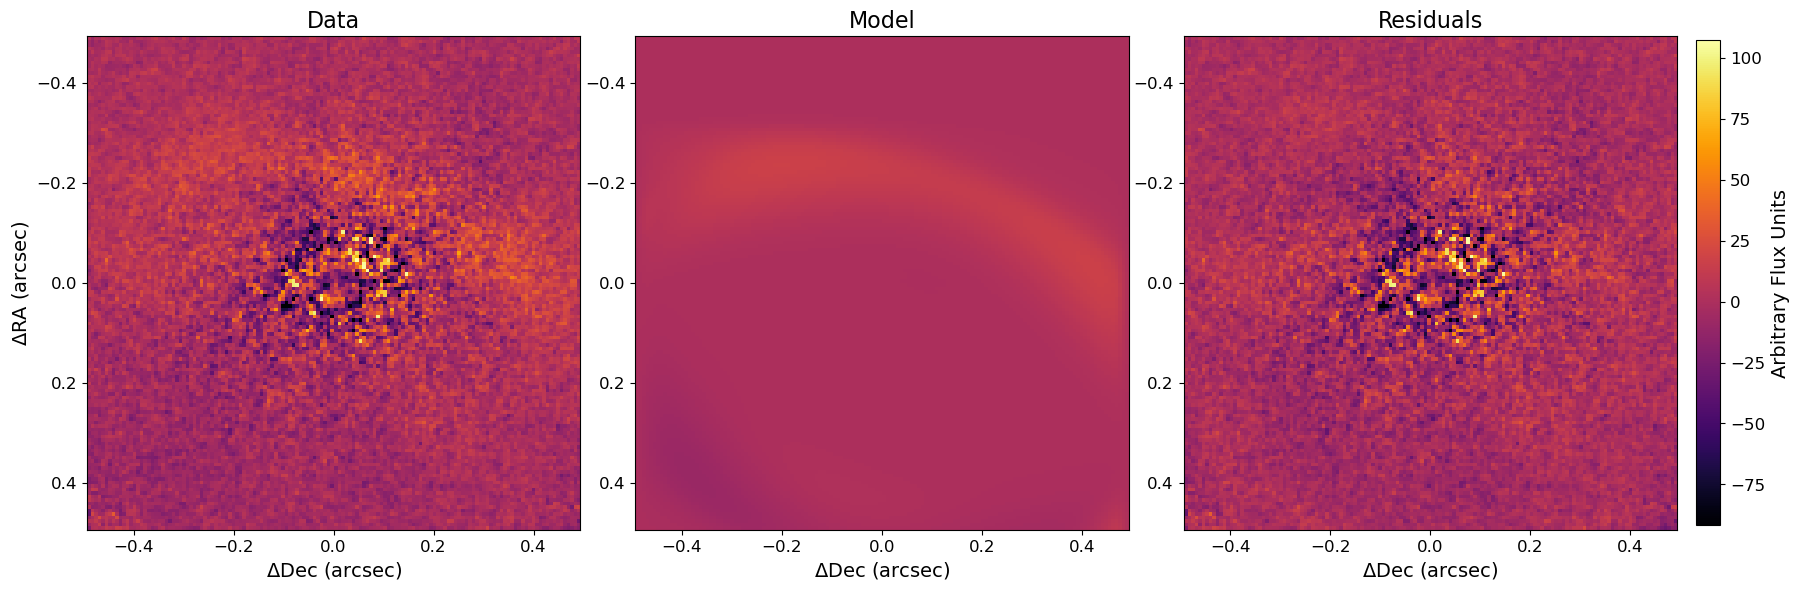

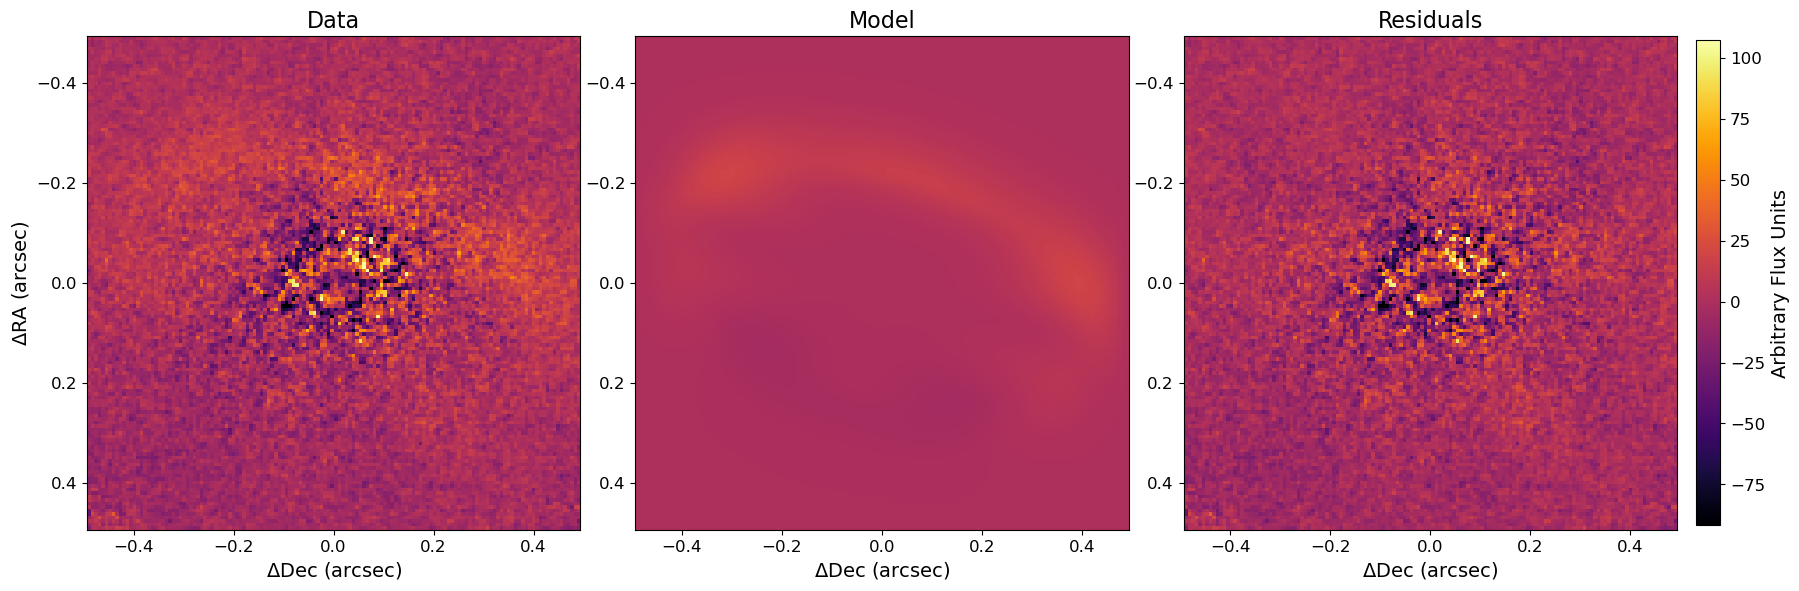

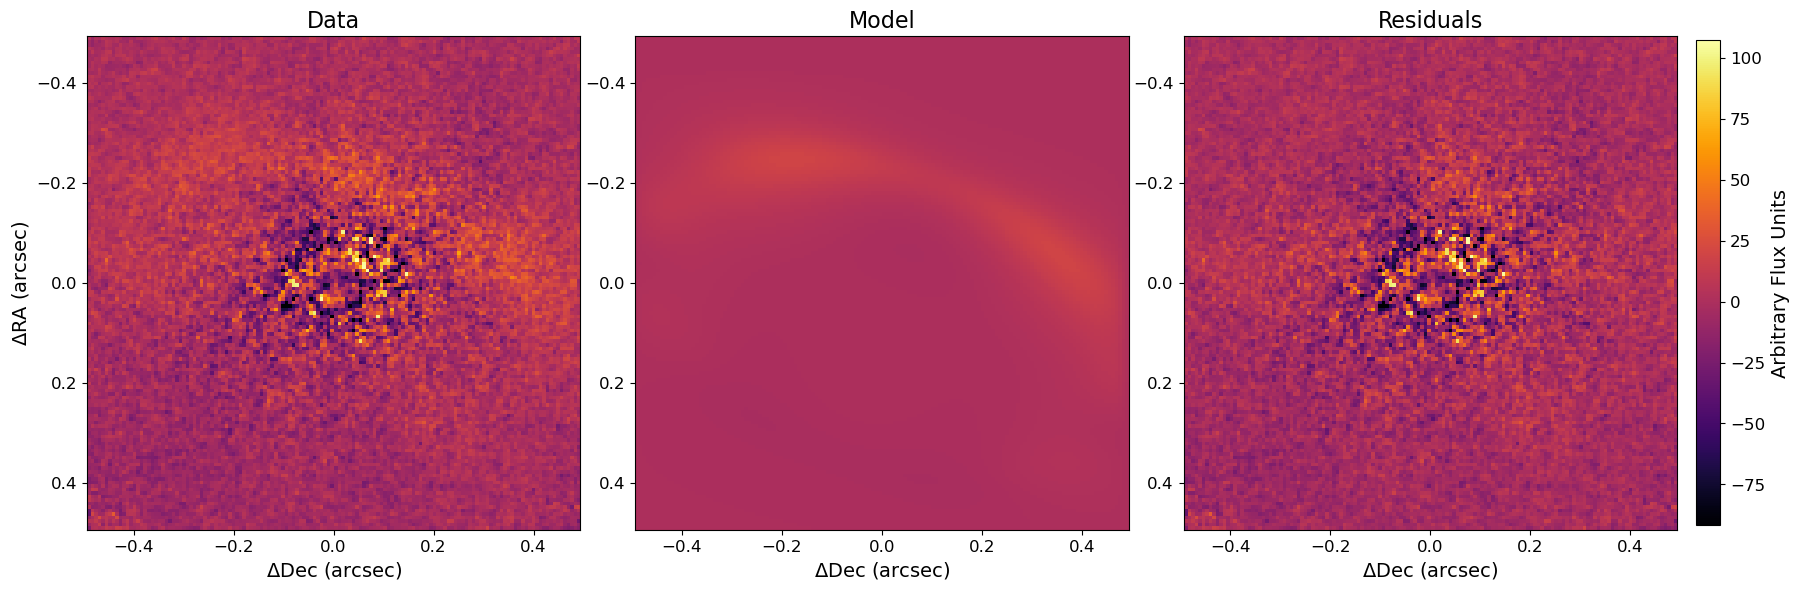

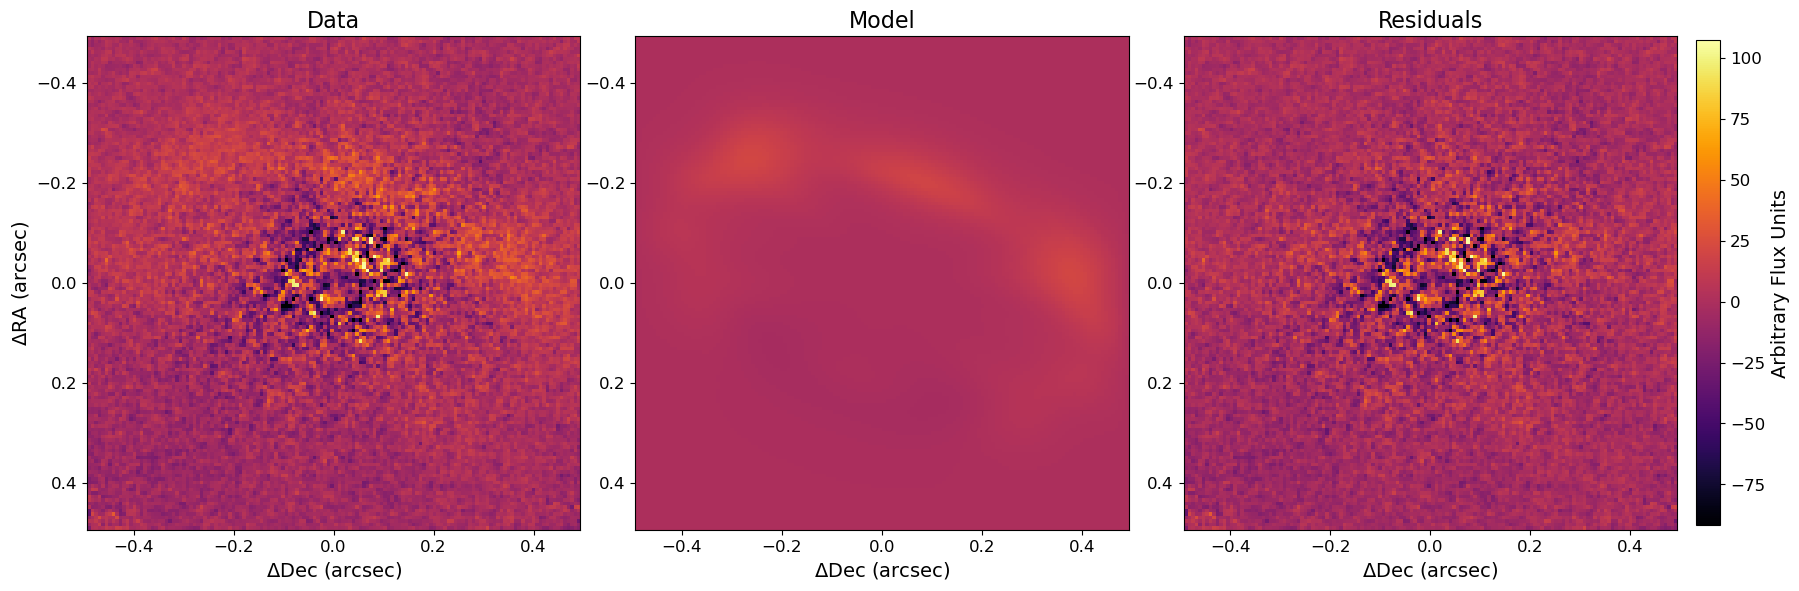

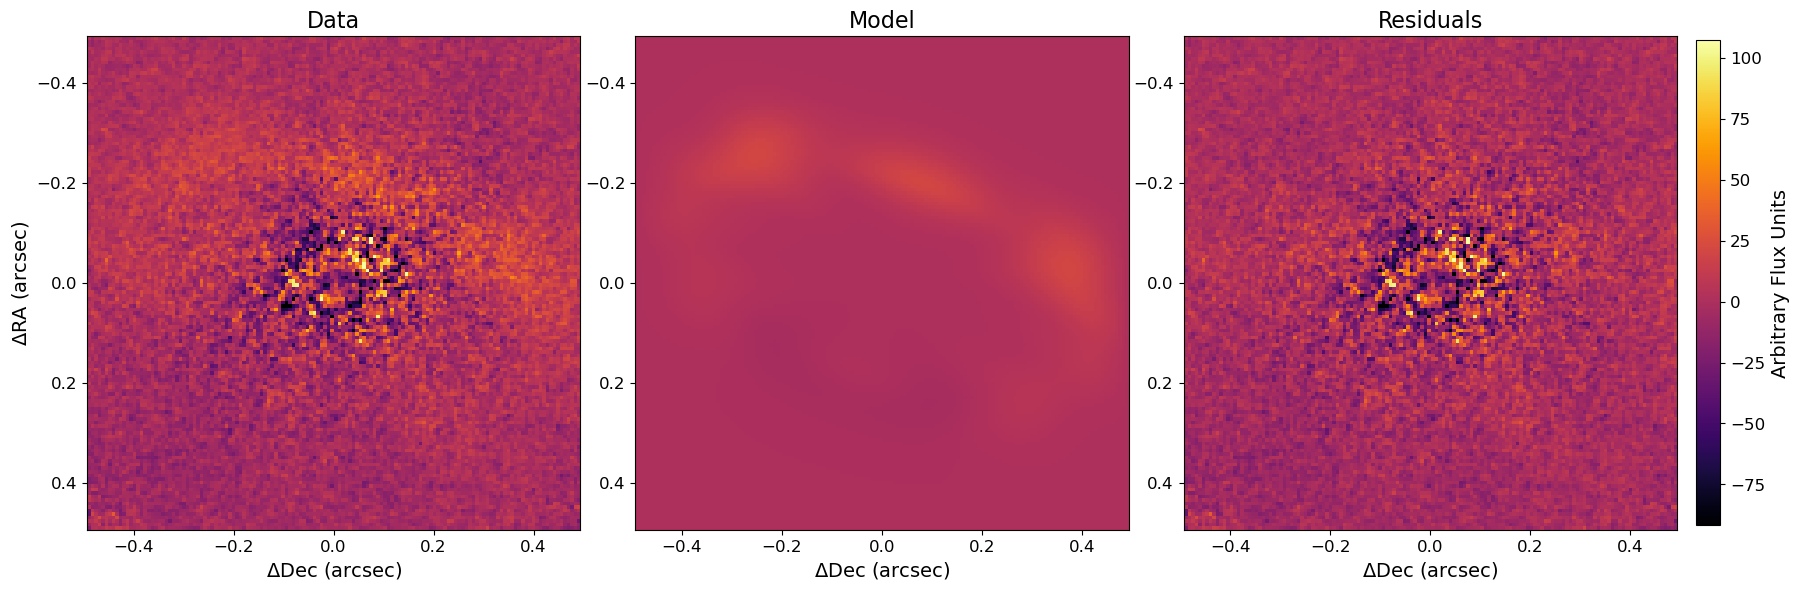

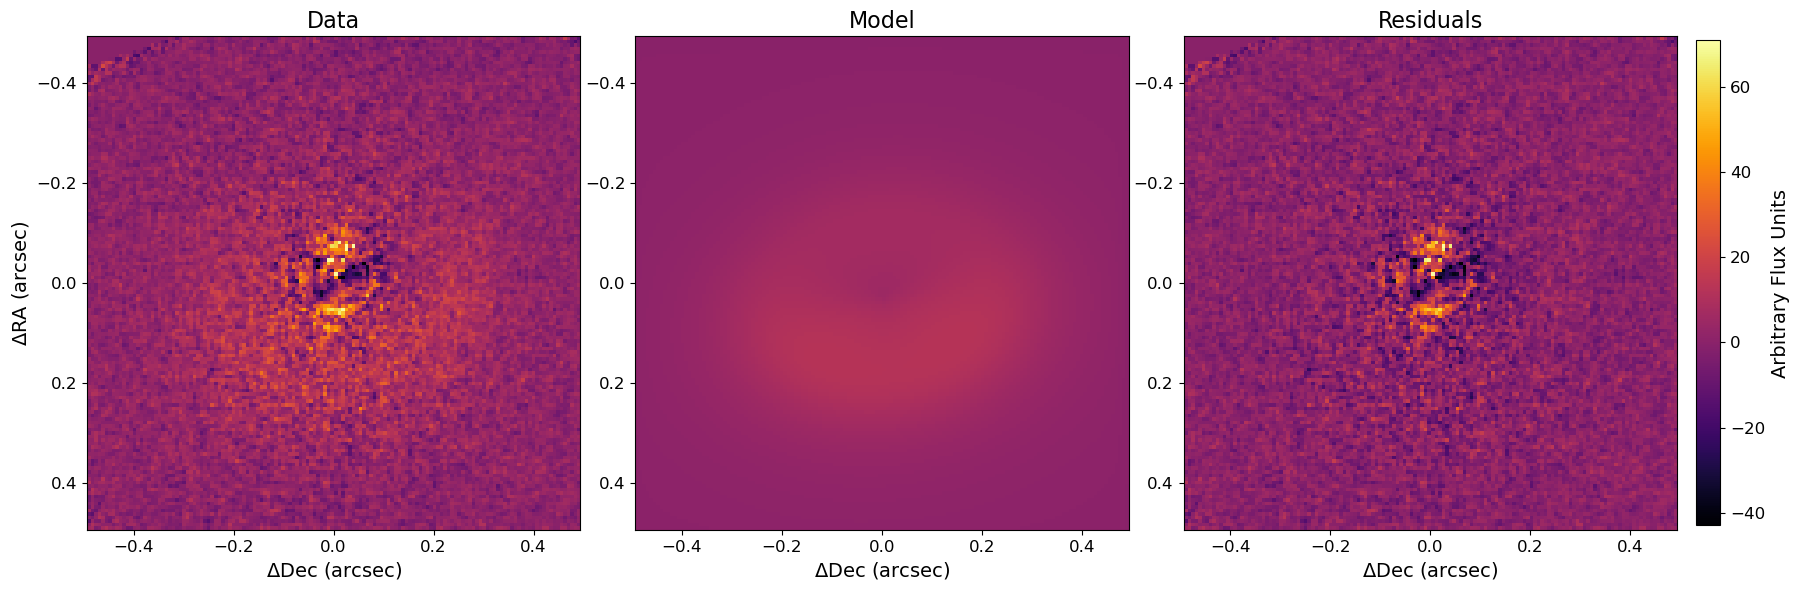

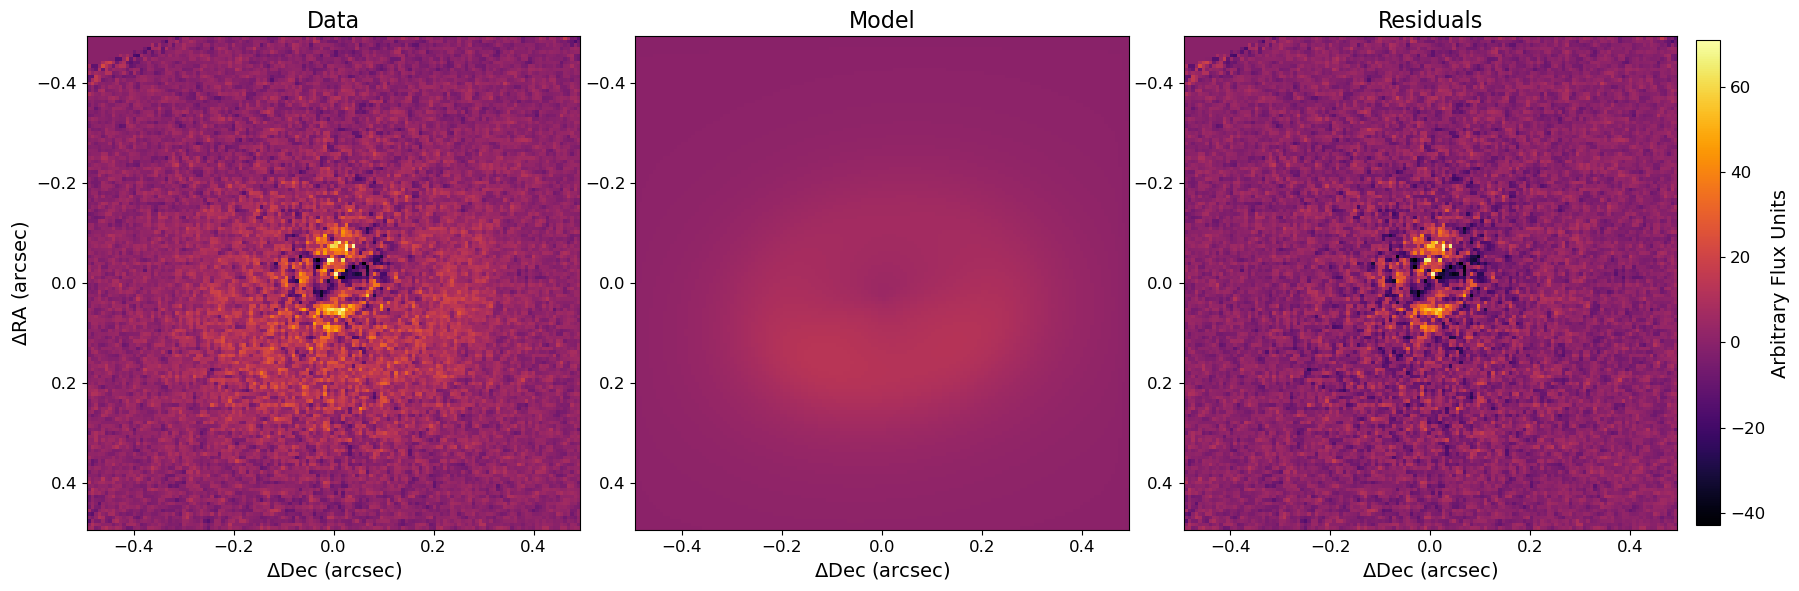

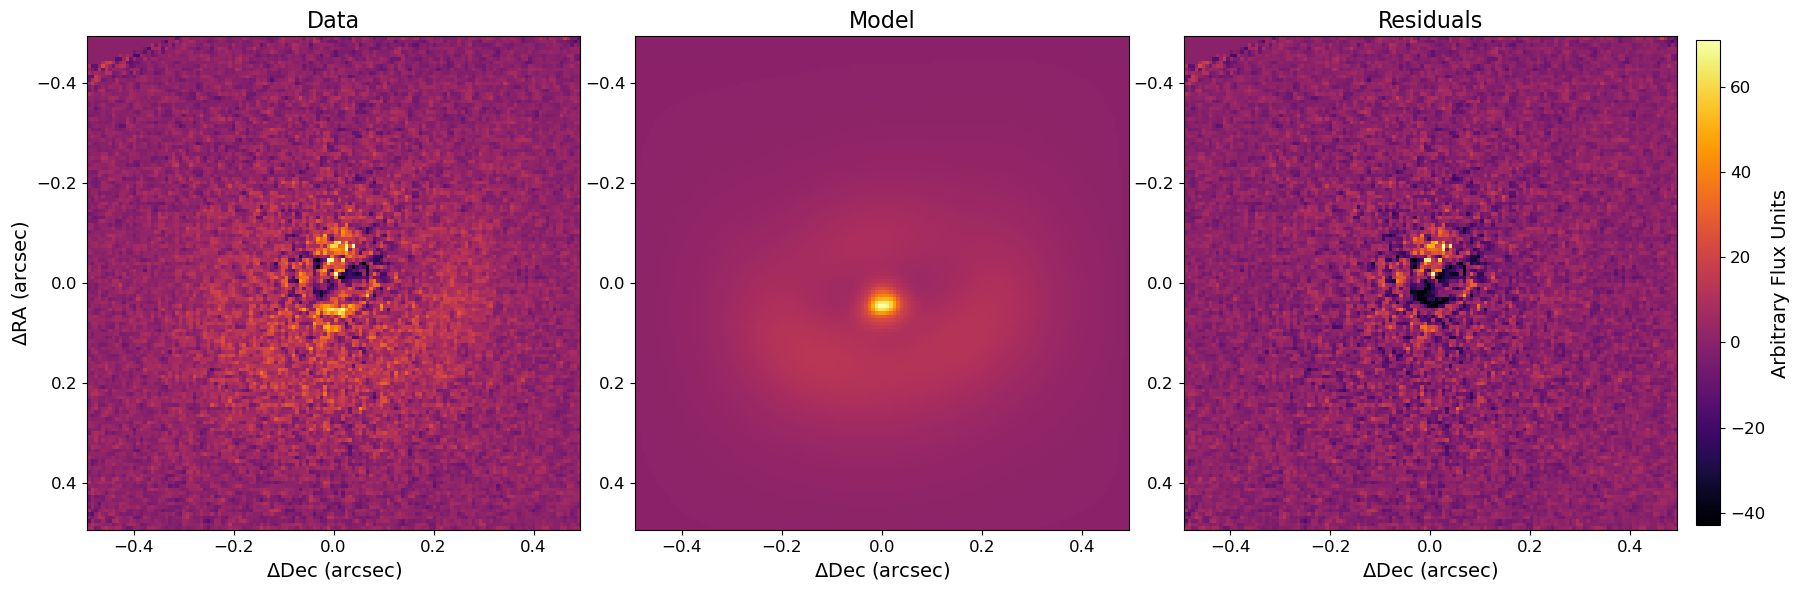

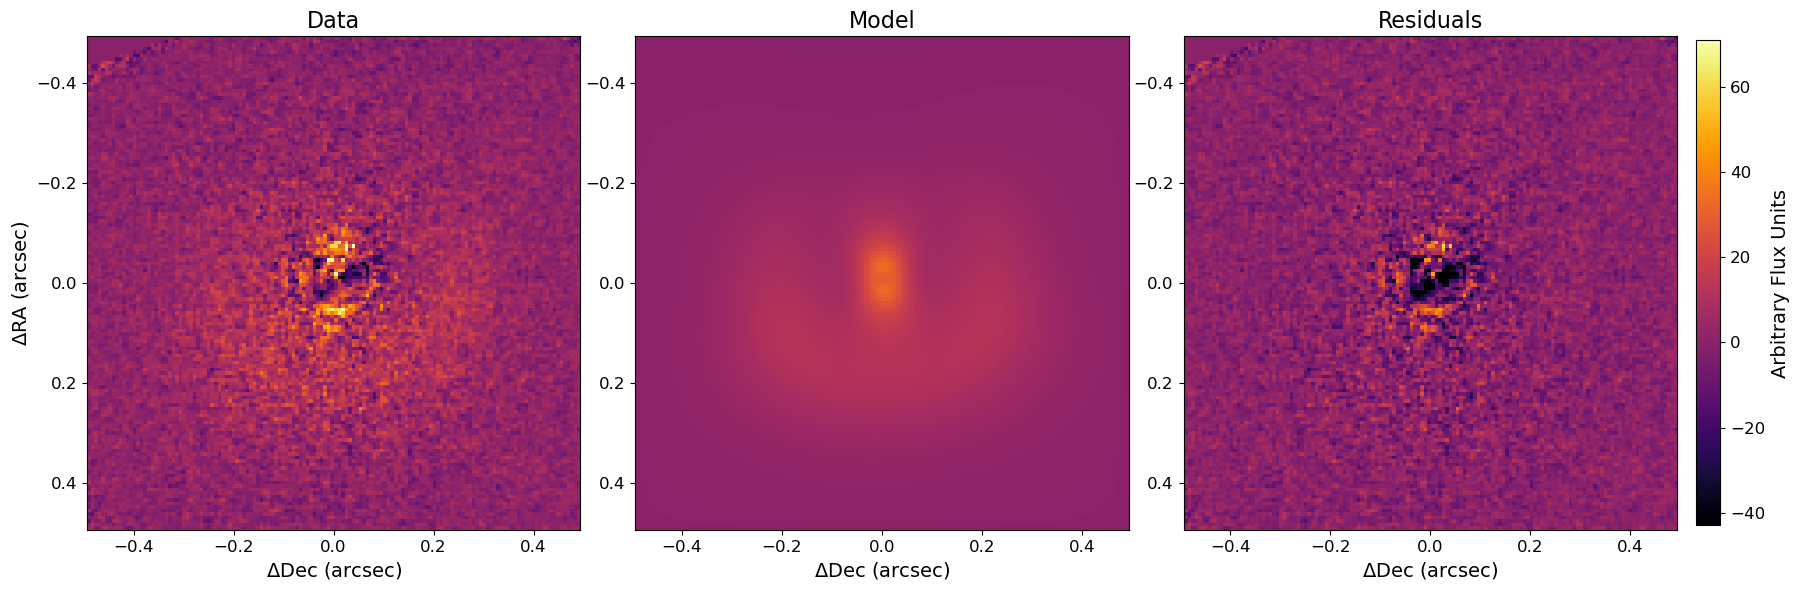

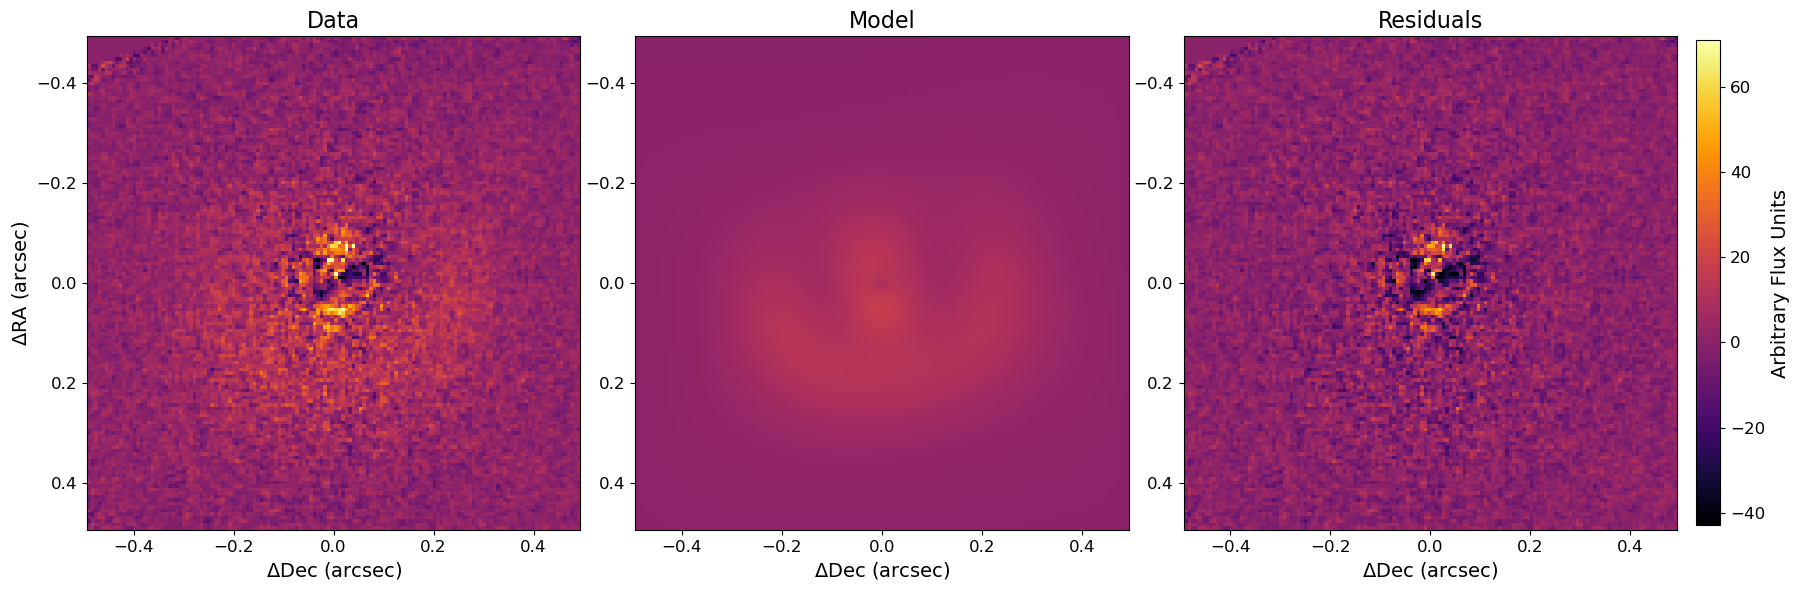

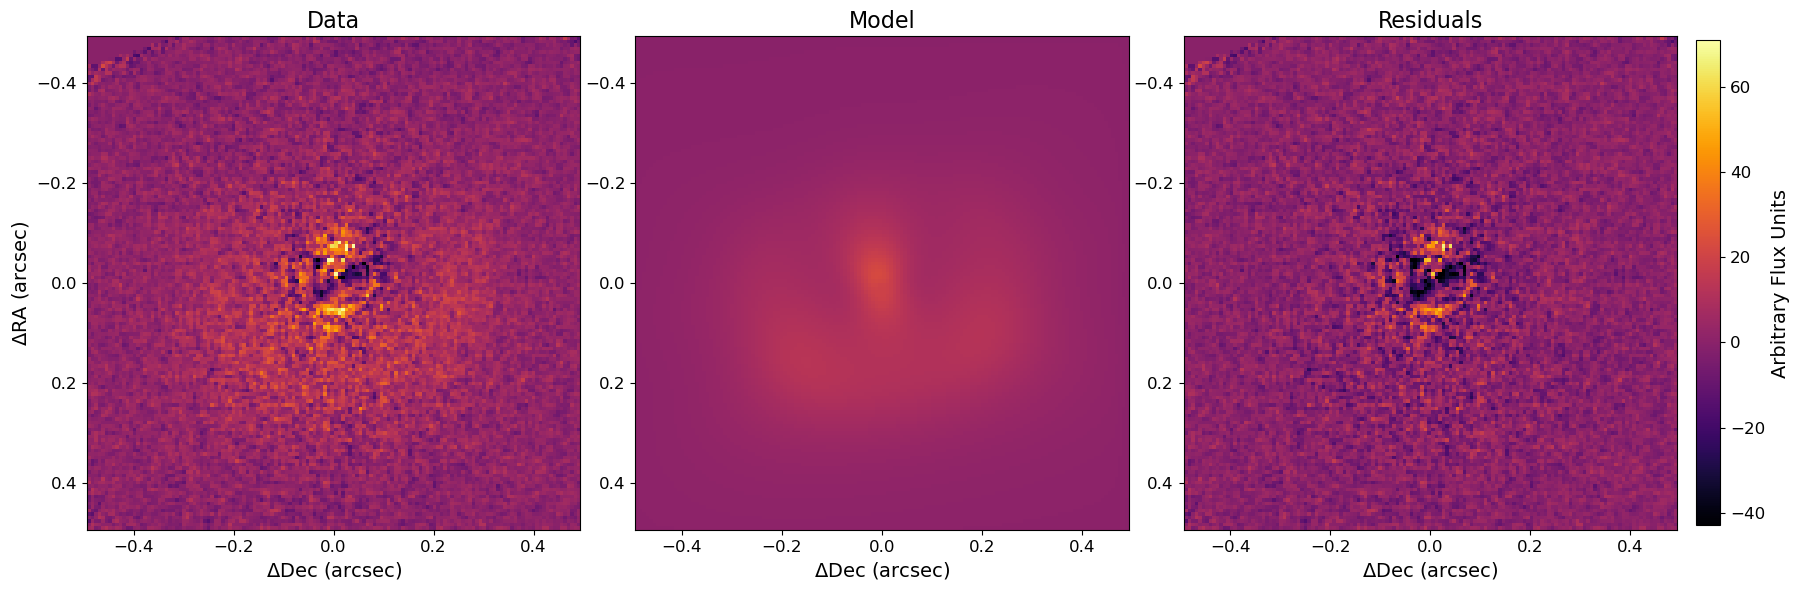

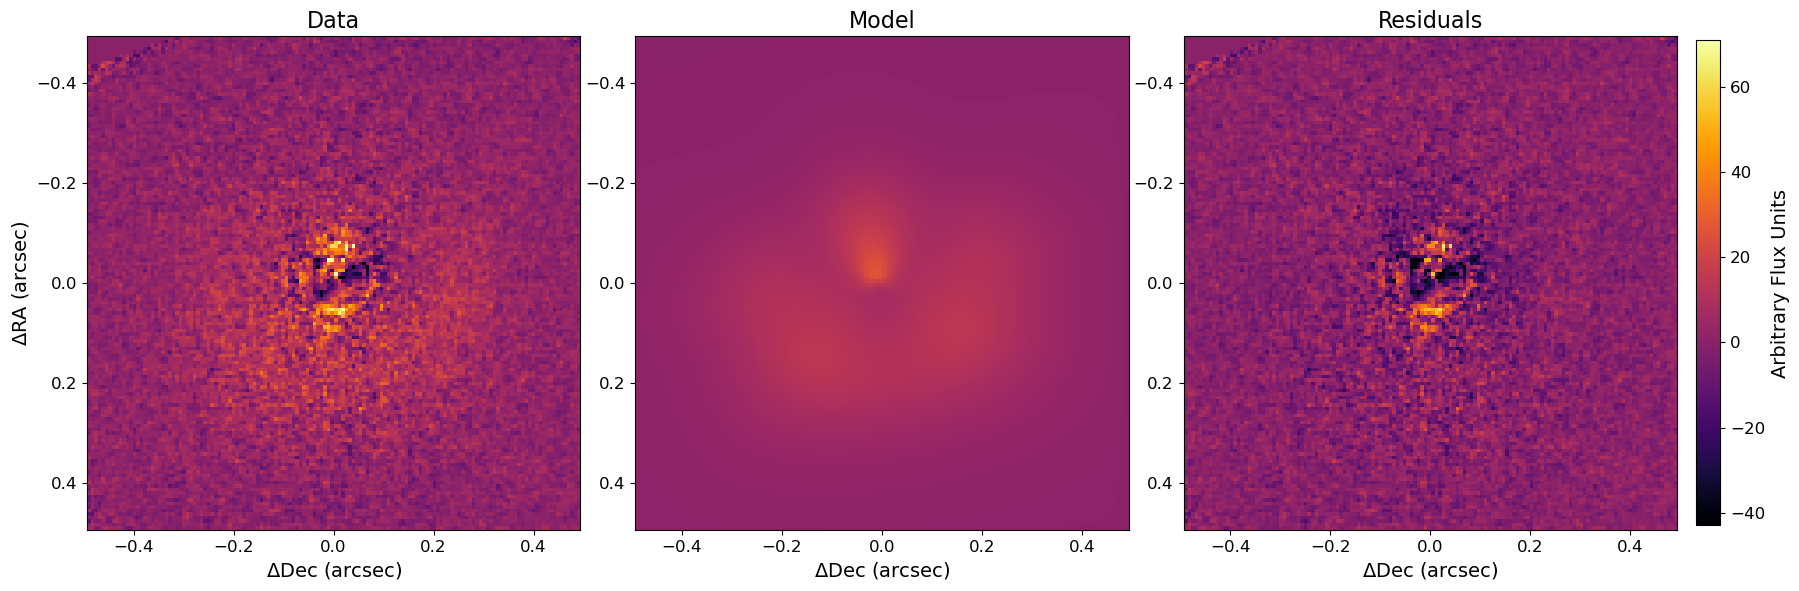

In [5]:
for l in list[19:]:
    bic_best = 1e10
    name = l.split('/')[2].split(".")[0]
    print('running initial fits for '+name)
    for k in range(4,11):
        model, params, ll, spf = gpi.init_fit(name,num_knots=k,save=True,plot=True)
        print('for {} knots: '.format(k))
        print('ll: ',ll)
        print('AIC: ',aic(ll, len(params)+len(spf),32400))
        print('BIC: ',bic(ll, len(params)+len(spf),32400))
        print('\n')
        bic_n = float(bic(ll, len(params)+len(spf),32400))
        if bic_n<bic_best:
            model_best = model
            params_best = params
            ll_best = ll
            spf_best = spf
            bic_best = bic_n
            k_best = k
    print('Best model for {}: {} knots'.format(name, k_best))